In [ ]:
!pip install pydub
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!ls -lh /content | wc -l


756


In [ ]:
import os
import shutil
from pydub import AudioSegment
from tqdm import tqdm

def setup_directory(output_dir):
    """Create a single directory to store all processed files."""
    os.makedirs(output_dir, exist_ok=True)
    print(f"Created directory: {output_dir}")
    return output_dir

def convert_audio(input_path, output_path):
    """Convert any audio format to WAV."""
    try:
        print(f"Converting {input_path} to {output_path}...")

        # Determine input format from file extension
        input_format = input_path.split('.')[-1].lower()

        # Load audio file
        if input_format in ['webm', 'ogg']:
            audio = AudioSegment.from_file(input_path, format=input_format)
        else:
            raise Exception(f"Unsupported format: {input_format}")

        # Export as WAV
        audio.export(output_path, format='wav')
        return True
    except Exception as e:
        print(f"Error converting {input_path}: {str(e)}")
        return False

def process_files(source_dir, output_dir):
    """Process JSON and audio files."""
    print(f"Looking for files in: {source_dir}")

    # List all files in the source directory
    all_files = os.listdir(source_dir)
    json_files = [f for f in all_files if f.endswith('.json')]
    audio_files = [f for f in all_files if f.endswith(('.webm', '.ogg'))]
    existing_wav_files = [f for f in all_files if f.endswith('.wav')]

    print(f"Found {len(json_files)} JSON files and {len(audio_files)} audio files to process.")

    # Copy JSON files to the output directory
    for json_file in tqdm(json_files, desc="Processing JSON files"):
        src_path = os.path.join(source_dir, json_file)
        dst_path = os.path.join(output_dir, json_file)
        shutil.copy2(src_path, dst_path)
        print(f"Copied JSON file: {json_file} to {output_dir}")

    # Convert audio files and save as WAV in the output directory
    for audio_file in tqdm(audio_files, desc="Processing audio files"):
        src_path = os.path.join(source_dir, audio_file)
        base_name = os.path.splitext(audio_file)[0]
        wav_name = base_name + '.wav'
        dst_path = os.path.join(output_dir, wav_name)

        # Skip conversion if WAV already exists
        if wav_name in existing_wav_files:
            print(f"Skipped existing WAV file: {wav_name}")
            continue

        if convert_audio(src_path, dst_path):
            print(f"Converted audio file: {audio_file} to WAV")
        else:
            print(f"Failed to convert audio file: {audio_file}")

def main():
    # Define source and output directories
    source_dir = '/content'  # Adjust this if files are elsewhere
    output_dir = '/content/processed_dataset'  # Single directory for all processed files

    print(f"Starting processing with source directory: {source_dir}")
    print(f"Directory exists: {os.path.exists(source_dir)}")

    # Setup output directory
    setup_directory(output_dir)

    # Process files
    process_files(source_dir, output_dir)

    print("\nProcessing complete!")
    print(f"Processed files are in: {output_dir}")

if __name__ == "__main__":
    main()


Starting processing with source directory: /content
Directory exists: True
Created directory: /content/processed_dataset
Looking for files in: /content
Found 377 JSON files and 332 audio files to process.


Processing JSON files:  36%|███▌      | 135/377 [00:00<00:00, 1348.99it/s]

Copied JSON file: 0b2bb739-8b32-4e0c-a8b7-6dea8e33738b.json to /content/processed_dataset
Copied JSON file: 0a68bfc4-e916-4c10-a087-9828c2452a68.json to /content/processed_dataset
Copied JSON file: 0b9b67c6-796d-4ed7-9a5d-aeaf0f8543b4.json to /content/processed_dataset
Copied JSON file: 0b110058-23cc-4396-9e99-34f78cb72ce8.json to /content/processed_dataset
Copied JSON file: 0bfc8a28-c7c5-433e-89d2-571a5d4b33d0.json to /content/processed_dataset
Copied JSON file: 0acfa353-f96c-4cc3-b7af-d6fcd0c359a5.json to /content/processed_dataset
Copied JSON file: 0b65469b-d327-4bf8-873d-a5a40c11b260.json to /content/processed_dataset
Copied JSON file: 0a07b7ef-ec8b-47a8-afb9-cc6ebeeb6505.json to /content/processed_dataset
Copied JSON file: 0a45f9a2-8201-4f56-86a4-e3410d1f75a8.json to /content/processed_dataset
Copied JSON file: 0a5b12c9-f676-4d22-9d8b-adcd3cf77f0f.json to /content/processed_dataset
Copied JSON file: 0c5cb34f-c2f1-4608-ac11-123751cf34f5.json to /content/processed_dataset
Copied JSO

Processing JSON files: 100%|██████████| 377/377 [00:00<00:00, 1674.08it/s]


Copied JSON file: 0c3f056d-dd20-4e29-849b-05e78bc6d42d.json to /content/processed_dataset
Copied JSON file: 0ad66251-aa2a-4b28-9a8b-e145cfc8bc21.json to /content/processed_dataset
Copied JSON file: 0b060755-8ddd-4a18-b724-12fd25599be9.json to /content/processed_dataset
Copied JSON file: 0a20c162-bf07-4f79-9d5d-5e6101ae20ab.json to /content/processed_dataset
Copied JSON file: 0b6ea0b5-e036-43ca-8462-d128f6232bdf.json to /content/processed_dataset
Copied JSON file: 00a2faca-e1f2-4848-9afe-058f949d3252.json to /content/processed_dataset
Copied JSON file: 0b768143-0de0-4ca5-aeb4-2a0f8eb66d80.json to /content/processed_dataset
Copied JSON file: 00e92287-1088-4c8b-97fc-a8502fce4ede.json to /content/processed_dataset
Copied JSON file: 0b4552b2-8dbe-4dd3-9825-5d453e4b5b3a.json to /content/processed_dataset
Copied JSON file: 00f4a67a-bdce-484d-b38c-e73c84799074.json to /content/processed_dataset
Copied JSON file: 00f34dc2-79e4-4551-ac94-fd38025b43da.json to /content/processed_dataset
Copied JSO

Processing audio files:   0%|          | 0/332 [00:00<?, ?it/s]

Converting /content/0bdeaba1-ede1-4622-9954-614964fc90f3.webm to /content/processed_dataset/0bdeaba1-ede1-4622-9954-614964fc90f3.wav...


Processing audio files:   0%|          | 1/332 [00:01<06:28,  1.17s/it]

Converted audio file: 0bdeaba1-ede1-4622-9954-614964fc90f3.webm to WAV
Converting /content/0a24fc10-114f-4741-9d4d-516848db8edf.webm to /content/processed_dataset/0a24fc10-114f-4741-9d4d-516848db8edf.wav...


Processing audio files:   1%|          | 2/332 [00:01<03:44,  1.47it/s]

Converted audio file: 0a24fc10-114f-4741-9d4d-516848db8edf.webm to WAV
Converting /content/00e77dfb-a4de-4e46-b0a1-a8fa2b94f3ef.webm to /content/processed_dataset/00e77dfb-a4de-4e46-b0a1-a8fa2b94f3ef.wav...


Processing audio files:   1%|          | 3/332 [00:01<02:38,  2.07it/s]

Converted audio file: 00e77dfb-a4de-4e46-b0a1-a8fa2b94f3ef.webm to WAV
Converting /content/0c63f8f4-ebd6-494c-88e0-e790a6f43353.webm to /content/processed_dataset/0c63f8f4-ebd6-494c-88e0-e790a6f43353.wav...


Processing audio files:   1%|          | 4/332 [00:02<02:17,  2.39it/s]

Converted audio file: 0c63f8f4-ebd6-494c-88e0-e790a6f43353.webm to WAV
Converting /content/0af91263-5c91-43b3-bbbd-ab20c08d115f.webm to /content/processed_dataset/0af91263-5c91-43b3-bbbd-ab20c08d115f.wav...


Processing audio files:   2%|▏         | 5/332 [00:02<01:58,  2.75it/s]

Converted audio file: 0af91263-5c91-43b3-bbbd-ab20c08d115f.webm to WAV
Converting /content/0aa72afa-cc54-4096-bc26-2a9e9cad184c.webm to /content/processed_dataset/0aa72afa-cc54-4096-bc26-2a9e9cad184c.wav...


Processing audio files:   2%|▏         | 6/332 [00:02<01:52,  2.91it/s]

Converted audio file: 0aa72afa-cc54-4096-bc26-2a9e9cad184c.webm to WAV
Converting /content/0c4bd3cb-f353-426e-b5fb-6ff548e711b4.webm to /content/processed_dataset/0c4bd3cb-f353-426e-b5fb-6ff548e711b4.wav...


Processing audio files:   2%|▏         | 7/332 [00:02<01:47,  3.03it/s]

Converted audio file: 0c4bd3cb-f353-426e-b5fb-6ff548e711b4.webm to WAV
Converting /content/0b302155-515f-49b5-9aba-e08f20999f70.webm to /content/processed_dataset/0b302155-515f-49b5-9aba-e08f20999f70.wav...


Processing audio files:   2%|▏         | 8/332 [00:03<01:41,  3.19it/s]

Converted audio file: 0b302155-515f-49b5-9aba-e08f20999f70.webm to WAV
Converting /content/0ad7f338-212e-4e4f-9767-01aa781f7a11.webm to /content/processed_dataset/0ad7f338-212e-4e4f-9767-01aa781f7a11.wav...


Processing audio files:   3%|▎         | 9/332 [00:03<01:44,  3.09it/s]

Converted audio file: 0ad7f338-212e-4e4f-9767-01aa781f7a11.webm to WAV
Converting /content/00ccf4e3-6e4f-4e6b-a16d-11b4a8999d1e.webm to /content/processed_dataset/00ccf4e3-6e4f-4e6b-a16d-11b4a8999d1e.wav...


Processing audio files:   3%|▎         | 10/332 [00:03<01:35,  3.36it/s]

Converted audio file: 00ccf4e3-6e4f-4e6b-a16d-11b4a8999d1e.webm to WAV
Converting /content/0b99d461-9714-49ab-946a-9152f4303760.webm to /content/processed_dataset/0b99d461-9714-49ab-946a-9152f4303760.wav...


Processing audio files:   3%|▎         | 11/332 [00:04<01:36,  3.33it/s]

Converted audio file: 0b99d461-9714-49ab-946a-9152f4303760.webm to WAV
Converting /content/0a6ddce4-896c-42be-b2dd-c70d315f9fd5.webm to /content/processed_dataset/0a6ddce4-896c-42be-b2dd-c70d315f9fd5.wav...


Processing audio files:   4%|▎         | 12/332 [00:04<01:33,  3.40it/s]

Converted audio file: 0a6ddce4-896c-42be-b2dd-c70d315f9fd5.webm to WAV
Converting /content/0a0464dc-64a6-48fb-be59-618436aefd63.webm to /content/processed_dataset/0a0464dc-64a6-48fb-be59-618436aefd63.wav...


Processing audio files:   4%|▍         | 13/332 [00:04<01:33,  3.42it/s]

Converted audio file: 0a0464dc-64a6-48fb-be59-618436aefd63.webm to WAV
Converting /content/0ad1264b-9338-4ed0-8bc9-224015e26efc.webm to /content/processed_dataset/0ad1264b-9338-4ed0-8bc9-224015e26efc.wav...


Processing audio files:   4%|▍         | 14/332 [00:04<01:34,  3.35it/s]

Converted audio file: 0ad1264b-9338-4ed0-8bc9-224015e26efc.webm to WAV
Converting /content/0ac6a271-f085-4691-afef-40091a6de2a0.webm to /content/processed_dataset/0ac6a271-f085-4691-afef-40091a6de2a0.wav...


Processing audio files:   5%|▍         | 15/332 [00:05<01:33,  3.37it/s]

Converted audio file: 0ac6a271-f085-4691-afef-40091a6de2a0.webm to WAV
Converting /content/0b19a880-eb36-4aeb-be1d-e03e36487dea.webm to /content/processed_dataset/0b19a880-eb36-4aeb-be1d-e03e36487dea.wav...


Processing audio files:   5%|▍         | 16/332 [00:05<01:36,  3.27it/s]

Converted audio file: 0b19a880-eb36-4aeb-be1d-e03e36487dea.webm to WAV
Converting /content/0bbd20db-8967-492c-ba5c-41eb1198a8c0.webm to /content/processed_dataset/0bbd20db-8967-492c-ba5c-41eb1198a8c0.wav...


Processing audio files:   5%|▌         | 17/332 [00:05<01:29,  3.52it/s]

Converted audio file: 0bbd20db-8967-492c-ba5c-41eb1198a8c0.webm to WAV
Converting /content/0aa872e8-aea9-4663-96fb-b0684b152c05.webm to /content/processed_dataset/0aa872e8-aea9-4663-96fb-b0684b152c05.wav...


Processing audio files:   5%|▌         | 18/332 [00:06<01:33,  3.36it/s]

Converted audio file: 0aa872e8-aea9-4663-96fb-b0684b152c05.webm to WAV
Converting /content/0b155ff1-3257-4a3b-a0b5-ac1b848af212.webm to /content/processed_dataset/0b155ff1-3257-4a3b-a0b5-ac1b848af212.wav...


Processing audio files:   6%|▌         | 19/332 [00:06<01:33,  3.34it/s]

Converted audio file: 0b155ff1-3257-4a3b-a0b5-ac1b848af212.webm to WAV
Converting /content/0a962406-7a73-4e2d-92b2-ab97f4da7fb4.ogg to /content/processed_dataset/0a962406-7a73-4e2d-92b2-ab97f4da7fb4.wav...


Processing audio files:   6%|▌         | 20/332 [00:06<01:33,  3.33it/s]

Converted audio file: 0a962406-7a73-4e2d-92b2-ab97f4da7fb4.ogg to WAV
Converting /content/00fcf65a-d331-4f86-9255-781e21cab38b.webm to /content/processed_dataset/00fcf65a-d331-4f86-9255-781e21cab38b.wav...


Processing audio files:   6%|▋         | 21/332 [00:07<01:33,  3.32it/s]

Converted audio file: 00fcf65a-d331-4f86-9255-781e21cab38b.webm to WAV
Converting /content/0b8340ef-cc61-4165-9f9f-930850bb56d7.webm to /content/processed_dataset/0b8340ef-cc61-4165-9f9f-930850bb56d7.wav...


Processing audio files:   7%|▋         | 22/332 [00:07<01:26,  3.57it/s]

Converted audio file: 0b8340ef-cc61-4165-9f9f-930850bb56d7.webm to WAV
Converting /content/0b26bdbc-210a-4054-a683-f155e67ad2d1.webm to /content/processed_dataset/0b26bdbc-210a-4054-a683-f155e67ad2d1.wav...


Processing audio files:   7%|▋         | 23/332 [00:07<01:32,  3.36it/s]

Converted audio file: 0b26bdbc-210a-4054-a683-f155e67ad2d1.webm to WAV
Converting /content/0a84322e-b7a8-4e66-8fa0-7294eb14a2b6.webm to /content/processed_dataset/0a84322e-b7a8-4e66-8fa0-7294eb14a2b6.wav...


Processing audio files:   7%|▋         | 24/332 [00:07<01:27,  3.51it/s]

Converted audio file: 0a84322e-b7a8-4e66-8fa0-7294eb14a2b6.webm to WAV
Converting /content/0b016126-f6b1-422e-96e5-7f09334ea144.webm to /content/processed_dataset/0b016126-f6b1-422e-96e5-7f09334ea144.wav...


Processing audio files:   8%|▊         | 25/332 [00:08<01:31,  3.36it/s]

Converted audio file: 0b016126-f6b1-422e-96e5-7f09334ea144.webm to WAV
Converting /content/0b8af555-2dcc-4398-8954-9c5f3c130322.webm to /content/processed_dataset/0b8af555-2dcc-4398-8954-9c5f3c130322.wav...


Processing audio files:   8%|▊         | 26/332 [00:08<01:34,  3.23it/s]

Converted audio file: 0b8af555-2dcc-4398-8954-9c5f3c130322.webm to WAV
Converting /content/0a4d3e7e-27d0-4c99-839b-103d26f06baf.webm to /content/processed_dataset/0a4d3e7e-27d0-4c99-839b-103d26f06baf.wav...


Processing audio files:   8%|▊         | 27/332 [00:08<01:28,  3.45it/s]

Converted audio file: 0a4d3e7e-27d0-4c99-839b-103d26f06baf.webm to WAV
Converting /content/0a19afca-10e9-4b55-bc1f-da761720bed6.webm to /content/processed_dataset/0a19afca-10e9-4b55-bc1f-da761720bed6.wav...


Processing audio files:   8%|▊         | 28/332 [00:09<01:30,  3.37it/s]

Converted audio file: 0a19afca-10e9-4b55-bc1f-da761720bed6.webm to WAV
Converting /content/0b45f304-da79-4184-816e-154099474dd0.webm to /content/processed_dataset/0b45f304-da79-4184-816e-154099474dd0.wav...


Processing audio files:   9%|▊         | 29/332 [00:09<01:28,  3.41it/s]

Converted audio file: 0b45f304-da79-4184-816e-154099474dd0.webm to WAV
Converting /content/0a4539a3-f6ea-474a-98de-f9fdfbd76049.webm to /content/processed_dataset/0a4539a3-f6ea-474a-98de-f9fdfbd76049.wav...


Processing audio files:   9%|▉         | 30/332 [00:09<01:28,  3.43it/s]

Converted audio file: 0a4539a3-f6ea-474a-98de-f9fdfbd76049.webm to WAV
Converting /content/0c5cb34f-c2f1-4608-ac11-123751cf34f5.webm to /content/processed_dataset/0c5cb34f-c2f1-4608-ac11-123751cf34f5.wav...


Processing audio files:   9%|▉         | 31/332 [00:10<01:46,  2.82it/s]

Converted audio file: 0c5cb34f-c2f1-4608-ac11-123751cf34f5.webm to WAV
Converting /content/0b426d83-97c9-4270-8c70-477a95112f95.webm to /content/processed_dataset/0b426d83-97c9-4270-8c70-477a95112f95.wav...


Processing audio files:  10%|▉         | 32/332 [00:10<02:10,  2.31it/s]

Converted audio file: 0b426d83-97c9-4270-8c70-477a95112f95.webm to WAV
Converting /content/0b2bb739-8b32-4e0c-a8b7-6dea8e33738b.webm to /content/processed_dataset/0b2bb739-8b32-4e0c-a8b7-6dea8e33738b.wav...


Processing audio files:  10%|▉         | 33/332 [00:11<02:00,  2.48it/s]

Converted audio file: 0b2bb739-8b32-4e0c-a8b7-6dea8e33738b.webm to WAV
Converting /content/0b16e44d-5b1c-4aae-93f7-23dc0bbbc74b.webm to /content/processed_dataset/0b16e44d-5b1c-4aae-93f7-23dc0bbbc74b.wav...


Processing audio files:  10%|█         | 34/332 [00:12<03:05,  1.61it/s]

Converted audio file: 0b16e44d-5b1c-4aae-93f7-23dc0bbbc74b.webm to WAV
Converting /content/0bb86215-dc84-4493-be5b-a9cb43fa8682.webm to /content/processed_dataset/0bb86215-dc84-4493-be5b-a9cb43fa8682.wav...


Processing audio files:  11%|█         | 35/332 [00:13<03:55,  1.26it/s]

Converted audio file: 0bb86215-dc84-4493-be5b-a9cb43fa8682.webm to WAV
Converting /content/0b207336-533a-42db-bb5a-bd783defee90.webm to /content/processed_dataset/0b207336-533a-42db-bb5a-bd783defee90.wav...


Processing audio files:  11%|█         | 36/332 [00:13<03:22,  1.46it/s]

Converted audio file: 0b207336-533a-42db-bb5a-bd783defee90.webm to WAV
Converting /content/0a375f1b-b3f3-4991-b9d4-9f6c22bf0bdd.webm to /content/processed_dataset/0a375f1b-b3f3-4991-b9d4-9f6c22bf0bdd.wav...


Processing audio files:  11%|█         | 37/332 [00:14<02:48,  1.75it/s]

Converted audio file: 0a375f1b-b3f3-4991-b9d4-9f6c22bf0bdd.webm to WAV
Converting /content/0c31c59e-7752-4c73-873f-bc1f37763dfd.webm to /content/processed_dataset/0c31c59e-7752-4c73-873f-bc1f37763dfd.wav...


Processing audio files:  11%|█▏        | 38/332 [00:14<02:24,  2.03it/s]

Converted audio file: 0c31c59e-7752-4c73-873f-bc1f37763dfd.webm to WAV
Converting /content/0b72bbdf-fe74-4c76-8c9a-9e4a60a7b9f9.webm to /content/processed_dataset/0b72bbdf-fe74-4c76-8c9a-9e4a60a7b9f9.wav...


Processing audio files:  12%|█▏        | 39/332 [00:14<02:12,  2.20it/s]

Converted audio file: 0b72bbdf-fe74-4c76-8c9a-9e4a60a7b9f9.webm to WAV
Converting /content/0c46b097-e0c6-4e8d-8486-ab5f64d8a055.webm to /content/processed_dataset/0c46b097-e0c6-4e8d-8486-ab5f64d8a055.wav...


Processing audio files:  12%|█▏        | 40/332 [00:15<02:09,  2.26it/s]

Converted audio file: 0c46b097-e0c6-4e8d-8486-ab5f64d8a055.webm to WAV
Converting /content/0a102ef5-4ede-47c8-8d51-a813d7631eda.webm to /content/processed_dataset/0a102ef5-4ede-47c8-8d51-a813d7631eda.wav...


Processing audio files:  12%|█▏        | 41/332 [00:15<02:08,  2.27it/s]

Converted audio file: 0a102ef5-4ede-47c8-8d51-a813d7631eda.webm to WAV
Converting /content/0c0aa4a7-91b3-43ef-b9f2-03c0beb3f27e.webm to /content/processed_dataset/0c0aa4a7-91b3-43ef-b9f2-03c0beb3f27e.wav...


Processing audio files:  13%|█▎        | 42/332 [00:16<02:09,  2.23it/s]

Converted audio file: 0c0aa4a7-91b3-43ef-b9f2-03c0beb3f27e.webm to WAV
Converting /content/0b02e75b-91b9-4afc-bc5d-243b90c406d0.webm to /content/processed_dataset/0b02e75b-91b9-4afc-bc5d-243b90c406d0.wav...


Processing audio files:  13%|█▎        | 43/332 [00:16<02:07,  2.27it/s]

Converted audio file: 0b02e75b-91b9-4afc-bc5d-243b90c406d0.webm to WAV
Converting /content/0b467189-37bc-488a-bf88-43611762fea8.webm to /content/processed_dataset/0b467189-37bc-488a-bf88-43611762fea8.wav...


Processing audio files:  13%|█▎        | 44/332 [00:16<01:58,  2.42it/s]

Converted audio file: 0b467189-37bc-488a-bf88-43611762fea8.webm to WAV
Converting /content/0adb5e7b-faf6-408d-b60a-79475776ad6d.ogg to /content/processed_dataset/0adb5e7b-faf6-408d-b60a-79475776ad6d.wav...


Processing audio files:  14%|█▎        | 45/332 [00:17<01:56,  2.47it/s]

Converted audio file: 0adb5e7b-faf6-408d-b60a-79475776ad6d.ogg to WAV
Converting /content/0b772603-fa90-4678-8a4f-3383d82f2e78.webm to /content/processed_dataset/0b772603-fa90-4678-8a4f-3383d82f2e78.wav...


Processing audio files:  14%|█▍        | 46/332 [00:17<01:57,  2.44it/s]

Converted audio file: 0b772603-fa90-4678-8a4f-3383d82f2e78.webm to WAV
Converting /content/0b5fd00b-4687-4f13-afed-e4ba17e562fd.webm to /content/processed_dataset/0b5fd00b-4687-4f13-afed-e4ba17e562fd.wav...


Processing audio files:  14%|█▍        | 47/332 [00:18<01:52,  2.52it/s]

Converted audio file: 0b5fd00b-4687-4f13-afed-e4ba17e562fd.webm to WAV
Converting /content/0be75221-126f-4971-bf65-d8c3189bfeff.webm to /content/processed_dataset/0be75221-126f-4971-bf65-d8c3189bfeff.wav...


Processing audio files:  14%|█▍        | 48/332 [00:18<01:51,  2.54it/s]

Converted audio file: 0be75221-126f-4971-bf65-d8c3189bfeff.webm to WAV
Converting /content/0aed7f53-9941-4a24-9b28-a64f68c6b435.webm to /content/processed_dataset/0aed7f53-9941-4a24-9b28-a64f68c6b435.wav...


Processing audio files:  15%|█▍        | 49/332 [00:18<01:47,  2.63it/s]

Converted audio file: 0aed7f53-9941-4a24-9b28-a64f68c6b435.webm to WAV
Converting /content/0c2c73ef-6e9d-4374-ac33-974d02911189.webm to /content/processed_dataset/0c2c73ef-6e9d-4374-ac33-974d02911189.wav...


Processing audio files:  15%|█▌        | 50/332 [00:19<01:50,  2.56it/s]

Converted audio file: 0c2c73ef-6e9d-4374-ac33-974d02911189.webm to WAV
Converting /content/0a80696f-06cf-4ed2-a409-2992d0023635.webm to /content/processed_dataset/0a80696f-06cf-4ed2-a409-2992d0023635.wav...


Processing audio files:  15%|█▌        | 51/332 [00:19<01:42,  2.75it/s]

Converted audio file: 0a80696f-06cf-4ed2-a409-2992d0023635.webm to WAV
Converting /content/0bdcd2c2-9bf5-496a-9d55-282fe28c723e.webm to /content/processed_dataset/0bdcd2c2-9bf5-496a-9d55-282fe28c723e.wav...


Processing audio files:  16%|█▌        | 52/332 [00:19<01:32,  3.04it/s]

Converted audio file: 0bdcd2c2-9bf5-496a-9d55-282fe28c723e.webm to WAV
Converting /content/0c1e2e8e-b55e-42d0-a3ab-f2da5cd060ac.ogg to /content/processed_dataset/0c1e2e8e-b55e-42d0-a3ab-f2da5cd060ac.wav...


Processing audio files:  16%|█▌        | 53/332 [00:20<01:34,  2.96it/s]

Converted audio file: 0c1e2e8e-b55e-42d0-a3ab-f2da5cd060ac.ogg to WAV
Converting /content/0b633d3d-8ae7-4253-9ee1-e6a06942189a.webm to /content/processed_dataset/0b633d3d-8ae7-4253-9ee1-e6a06942189a.wav...


Processing audio files:  16%|█▋        | 54/332 [00:20<01:34,  2.96it/s]

Converted audio file: 0b633d3d-8ae7-4253-9ee1-e6a06942189a.webm to WAV
Converting /content/0bbadac1-7d72-4450-8990-c1d4487241bd.webm to /content/processed_dataset/0bbadac1-7d72-4450-8990-c1d4487241bd.wav...


Processing audio files:  17%|█▋        | 55/332 [00:20<01:29,  3.09it/s]

Converted audio file: 0bbadac1-7d72-4450-8990-c1d4487241bd.webm to WAV
Converting /content/0b03673a-28db-4e1c-aeb0-4fec88d977a1.webm to /content/processed_dataset/0b03673a-28db-4e1c-aeb0-4fec88d977a1.wav...


Processing audio files:  17%|█▋        | 56/332 [00:21<01:30,  3.06it/s]

Converted audio file: 0b03673a-28db-4e1c-aeb0-4fec88d977a1.webm to WAV
Converting /content/0bb1359f-83db-4ce3-8c93-b2b3e1b701cd.webm to /content/processed_dataset/0bb1359f-83db-4ce3-8c93-b2b3e1b701cd.wav...


Processing audio files:  17%|█▋        | 57/332 [00:21<01:25,  3.23it/s]

Converted audio file: 0bb1359f-83db-4ce3-8c93-b2b3e1b701cd.webm to WAV
Converting /content/0ab97aa4-9a60-4fae-98df-4052f500d118.webm to /content/processed_dataset/0ab97aa4-9a60-4fae-98df-4052f500d118.wav...


Processing audio files:  17%|█▋        | 58/332 [00:21<01:25,  3.21it/s]

Converted audio file: 0ab97aa4-9a60-4fae-98df-4052f500d118.webm to WAV
Converting /content/0c68c302-724f-49e0-a00c-9cbe64cd9f1d.webm to /content/processed_dataset/0c68c302-724f-49e0-a00c-9cbe64cd9f1d.wav...


Processing audio files:  18%|█▊        | 59/332 [00:22<01:25,  3.20it/s]

Converted audio file: 0c68c302-724f-49e0-a00c-9cbe64cd9f1d.webm to WAV
Converting /content/0b3cba9a-5adc-4862-a23b-a5314c4caf2f.webm to /content/processed_dataset/0b3cba9a-5adc-4862-a23b-a5314c4caf2f.wav...


Processing audio files:  18%|█▊        | 60/332 [00:22<01:22,  3.29it/s]

Converted audio file: 0b3cba9a-5adc-4862-a23b-a5314c4caf2f.webm to WAV
Converting /content/0ba98842-406e-4aa8-877d-75f8104e94d4.webm to /content/processed_dataset/0ba98842-406e-4aa8-877d-75f8104e94d4.wav...


Processing audio files:  18%|█▊        | 61/332 [00:22<01:21,  3.31it/s]

Converted audio file: 0ba98842-406e-4aa8-877d-75f8104e94d4.webm to WAV
Converting /content/0b14b4fa-edf0-4595-89af-d4a69208205b.webm to /content/processed_dataset/0b14b4fa-edf0-4595-89af-d4a69208205b.wav...


Processing audio files:  19%|█▊        | 62/332 [00:22<01:17,  3.49it/s]

Converted audio file: 0b14b4fa-edf0-4595-89af-d4a69208205b.webm to WAV
Converting /content/0b37f570-524a-4543-96f3-112f6096349a.webm to /content/processed_dataset/0b37f570-524a-4543-96f3-112f6096349a.wav...


Processing audio files:  19%|█▉        | 63/332 [00:23<01:20,  3.36it/s]

Converted audio file: 0b37f570-524a-4543-96f3-112f6096349a.webm to WAV
Converting /content/0c5e31d0-105e-4132-94a5-9975f0b82c75.webm to /content/processed_dataset/0c5e31d0-105e-4132-94a5-9975f0b82c75.wav...


Processing audio files:  19%|█▉        | 64/332 [00:23<01:17,  3.46it/s]

Converted audio file: 0c5e31d0-105e-4132-94a5-9975f0b82c75.webm to WAV
Converting /content/0acb8223-4c5f-4237-b421-56e438b25007.webm to /content/processed_dataset/0acb8223-4c5f-4237-b421-56e438b25007.wav...


Processing audio files:  20%|█▉        | 65/332 [00:23<01:18,  3.38it/s]

Converted audio file: 0acb8223-4c5f-4237-b421-56e438b25007.webm to WAV
Converting /content/0ac97b6c-853f-43bf-95ae-86938aa857d2.webm to /content/processed_dataset/0ac97b6c-853f-43bf-95ae-86938aa857d2.wav...


Processing audio files:  20%|█▉        | 66/332 [00:24<01:16,  3.49it/s]

Converted audio file: 0ac97b6c-853f-43bf-95ae-86938aa857d2.webm to WAV
Converting /content/0a481ee1-03a9-4344-baf9-46d20233d5bf.webm to /content/processed_dataset/0a481ee1-03a9-4344-baf9-46d20233d5bf.wav...


Processing audio files:  20%|██        | 67/332 [00:24<01:18,  3.38it/s]

Converted audio file: 0a481ee1-03a9-4344-baf9-46d20233d5bf.webm to WAV
Converting /content/0a9694b5-eccb-45a6-8377-72b4788d6e88.webm to /content/processed_dataset/0a9694b5-eccb-45a6-8377-72b4788d6e88.wav...


Processing audio files:  20%|██        | 68/332 [00:24<01:23,  3.15it/s]

Converted audio file: 0a9694b5-eccb-45a6-8377-72b4788d6e88.webm to WAV
Converting /content/0c56a842-e40b-4144-92c4-7d5a6a92b74d.webm to /content/processed_dataset/0c56a842-e40b-4144-92c4-7d5a6a92b74d.wav...


Processing audio files:  21%|██        | 69/332 [00:25<01:18,  3.36it/s]

Converted audio file: 0c56a842-e40b-4144-92c4-7d5a6a92b74d.webm to WAV
Converting /content/0b590d4e-484c-4379-83a7-535df2c16319.ogg to /content/processed_dataset/0b590d4e-484c-4379-83a7-535df2c16319.wav...


Processing audio files:  21%|██        | 70/332 [00:25<01:24,  3.08it/s]

Converted audio file: 0b590d4e-484c-4379-83a7-535df2c16319.ogg to WAV
Converting /content/0b130d1c-e411-46fe-9e38-71c11f9d9195.webm to /content/processed_dataset/0b130d1c-e411-46fe-9e38-71c11f9d9195.wav...


Processing audio files:  21%|██▏       | 71/332 [00:25<01:19,  3.30it/s]

Converted audio file: 0b130d1c-e411-46fe-9e38-71c11f9d9195.webm to WAV
Converting /content/0c70e9eb-a1fe-4604-ab82-f2c4270d8a22.webm to /content/processed_dataset/0c70e9eb-a1fe-4604-ab82-f2c4270d8a22.wav...


Processing audio files:  22%|██▏       | 72/332 [00:25<01:14,  3.48it/s]

Converted audio file: 0c70e9eb-a1fe-4604-ab82-f2c4270d8a22.webm to WAV
Converting /content/0b82cd46-2046-4a59-adeb-1f234e5a2d27.webm to /content/processed_dataset/0b82cd46-2046-4a59-adeb-1f234e5a2d27.wav...


Processing audio files:  22%|██▏       | 73/332 [00:26<01:10,  3.66it/s]

Converted audio file: 0b82cd46-2046-4a59-adeb-1f234e5a2d27.webm to WAV
Converting /content/00cab9a7-6d1b-44ac-b2b0-3beefebee783.webm to /content/processed_dataset/00cab9a7-6d1b-44ac-b2b0-3beefebee783.wav...


Processing audio files:  22%|██▏       | 74/332 [00:26<01:09,  3.73it/s]

Converted audio file: 00cab9a7-6d1b-44ac-b2b0-3beefebee783.webm to WAV
Converting /content/0b57a1df-e4b0-460b-96bc-5e40e85e37af.webm to /content/processed_dataset/0b57a1df-e4b0-460b-96bc-5e40e85e37af.wav...


Processing audio files:  23%|██▎       | 75/332 [00:26<01:05,  3.95it/s]

Converted audio file: 0b57a1df-e4b0-460b-96bc-5e40e85e37af.webm to WAV
Converting /content/0bf9d176-1f52-4b1a-b247-56a0f2b94374.ogg to /content/processed_dataset/0bf9d176-1f52-4b1a-b247-56a0f2b94374.wav...


Processing audio files:  23%|██▎       | 76/332 [00:26<01:05,  3.90it/s]

Converted audio file: 0bf9d176-1f52-4b1a-b247-56a0f2b94374.ogg to WAV
Converting /content/0b04892b-156f-4796-af54-92abe18db5d9.webm to /content/processed_dataset/0b04892b-156f-4796-af54-92abe18db5d9.wav...


Processing audio files:  23%|██▎       | 77/332 [00:27<01:05,  3.92it/s]

Converted audio file: 0b04892b-156f-4796-af54-92abe18db5d9.webm to WAV
Converting /content/0b55a094-52e3-4988-a436-5da9c1379303.webm to /content/processed_dataset/0b55a094-52e3-4988-a436-5da9c1379303.wav...


Processing audio files:  23%|██▎       | 78/332 [00:27<01:05,  3.87it/s]

Converted audio file: 0b55a094-52e3-4988-a436-5da9c1379303.webm to WAV
Converting /content/0a92ec33-e8ae-4bda-89b1-7cf92cd63a22.webm to /content/processed_dataset/0a92ec33-e8ae-4bda-89b1-7cf92cd63a22.wav...


Processing audio files:  24%|██▍       | 79/332 [00:27<01:05,  3.89it/s]

Converted audio file: 0a92ec33-e8ae-4bda-89b1-7cf92cd63a22.webm to WAV
Converting /content/00a2faca-e1f2-4848-9afe-058f949d3252.webm to /content/processed_dataset/00a2faca-e1f2-4848-9afe-058f949d3252.wav...


Processing audio files:  24%|██▍       | 80/332 [00:27<01:04,  3.91it/s]

Converted audio file: 00a2faca-e1f2-4848-9afe-058f949d3252.webm to WAV
Converting /content/0ae866c7-df48-4ea9-911a-5be9c8a0b567.webm to /content/processed_dataset/0ae866c7-df48-4ea9-911a-5be9c8a0b567.wav...


Processing audio files:  24%|██▍       | 81/332 [00:28<01:03,  3.96it/s]

Converted audio file: 0ae866c7-df48-4ea9-911a-5be9c8a0b567.webm to WAV
Converting /content/0aa5a3c2-af84-4858-b92b-4176791ca1c4.webm to /content/processed_dataset/0aa5a3c2-af84-4858-b92b-4176791ca1c4.wav...


Processing audio files:  25%|██▍       | 82/332 [00:28<01:04,  3.90it/s]

Converted audio file: 0aa5a3c2-af84-4858-b92b-4176791ca1c4.webm to WAV
Converting /content/0ba5e230-9660-4037-972d-41d247fecfdd.webm to /content/processed_dataset/0ba5e230-9660-4037-972d-41d247fecfdd.wav...


Processing audio files:  25%|██▌       | 83/332 [00:28<01:04,  3.89it/s]

Converted audio file: 0ba5e230-9660-4037-972d-41d247fecfdd.webm to WAV
Converting /content/00e0a33c-6561-406e-b543-4c9f07b860f7.webm to /content/processed_dataset/00e0a33c-6561-406e-b543-4c9f07b860f7.wav...


Processing audio files:  25%|██▌       | 84/332 [00:28<01:03,  3.92it/s]

Converted audio file: 00e0a33c-6561-406e-b543-4c9f07b860f7.webm to WAV
Converting /content/0b4dbd11-61ee-480d-96c7-9cf684053894.webm to /content/processed_dataset/0b4dbd11-61ee-480d-96c7-9cf684053894.wav...


Processing audio files:  26%|██▌       | 85/332 [00:29<01:03,  3.92it/s]

Converted audio file: 0b4dbd11-61ee-480d-96c7-9cf684053894.webm to WAV
Converting /content/00ce9f7f-e738-474b-a7fc-ab4d3cf323df.webm to /content/processed_dataset/00ce9f7f-e738-474b-a7fc-ab4d3cf323df.wav...


Processing audio files:  26%|██▌       | 86/332 [00:29<01:08,  3.57it/s]

Converted audio file: 00ce9f7f-e738-474b-a7fc-ab4d3cf323df.webm to WAV
Converting /content/0ad8ca95-509e-48af-8d54-9cef91eab64a.webm to /content/processed_dataset/0ad8ca95-509e-48af-8d54-9cef91eab64a.wav...


Processing audio files:  26%|██▌       | 87/332 [00:29<01:13,  3.35it/s]

Converted audio file: 0ad8ca95-509e-48af-8d54-9cef91eab64a.webm to WAV
Converting /content/0c6e544c-c525-4c91-a2b1-3f5cc5902680.webm to /content/processed_dataset/0c6e544c-c525-4c91-a2b1-3f5cc5902680.wav...


Processing audio files:  27%|██▋       | 88/332 [00:30<01:20,  3.05it/s]

Converted audio file: 0c6e544c-c525-4c91-a2b1-3f5cc5902680.webm to WAV
Converting /content/0a97ab37-81b4-4cfe-ba54-e88a7e579d72.webm to /content/processed_dataset/0a97ab37-81b4-4cfe-ba54-e88a7e579d72.wav...


Processing audio files:  27%|██▋       | 89/332 [00:30<01:24,  2.89it/s]

Converted audio file: 0a97ab37-81b4-4cfe-ba54-e88a7e579d72.webm to WAV
Converting /content/00ddf050-6939-4f33-9e54-fcb309b895ec.webm to /content/processed_dataset/00ddf050-6939-4f33-9e54-fcb309b895ec.wav...


Processing audio files:  27%|██▋       | 90/332 [00:31<01:25,  2.82it/s]

Converted audio file: 00ddf050-6939-4f33-9e54-fcb309b895ec.webm to WAV
Converting /content/0c27ef6a-89f0-4afb-a2e7-d963d5c534e5.webm to /content/processed_dataset/0c27ef6a-89f0-4afb-a2e7-d963d5c534e5.wav...


Processing audio files:  27%|██▋       | 91/332 [00:31<01:27,  2.76it/s]

Converted audio file: 0c27ef6a-89f0-4afb-a2e7-d963d5c534e5.webm to WAV
Converting /content/0ab11ce0-9602-4690-b1e5-c3e838670d98.webm to /content/processed_dataset/0ab11ce0-9602-4690-b1e5-c3e838670d98.wav...


Processing audio files:  28%|██▊       | 92/332 [00:31<01:30,  2.66it/s]

Converted audio file: 0ab11ce0-9602-4690-b1e5-c3e838670d98.webm to WAV
Converting /content/0a73ebfd-ff81-4f48-9cdc-472db1fde25f.webm to /content/processed_dataset/0a73ebfd-ff81-4f48-9cdc-472db1fde25f.wav...


Processing audio files:  28%|██▊       | 93/332 [00:32<01:32,  2.57it/s]

Converted audio file: 0a73ebfd-ff81-4f48-9cdc-472db1fde25f.webm to WAV
Converting /content/0b3ec87b-b882-4a57-9cae-b391ccb360e4.webm to /content/processed_dataset/0b3ec87b-b882-4a57-9cae-b391ccb360e4.wav...


Processing audio files:  28%|██▊       | 94/332 [00:32<01:33,  2.55it/s]

Converted audio file: 0b3ec87b-b882-4a57-9cae-b391ccb360e4.webm to WAV
Converting /content/0b5d2f98-1468-430b-97dc-89cb2e2e413a.webm to /content/processed_dataset/0b5d2f98-1468-430b-97dc-89cb2e2e413a.wav...


Processing audio files:  29%|██▊       | 95/332 [00:33<01:31,  2.59it/s]

Converted audio file: 0b5d2f98-1468-430b-97dc-89cb2e2e413a.webm to WAV
Converting /content/0a47e9a8-6b7f-4138-ba12-00f3bd1a8158.webm to /content/processed_dataset/0a47e9a8-6b7f-4138-ba12-00f3bd1a8158.wav...


Processing audio files:  29%|██▉       | 96/332 [00:33<01:32,  2.54it/s]

Converted audio file: 0a47e9a8-6b7f-4138-ba12-00f3bd1a8158.webm to WAV
Converting /content/0b0b0aa7-b3fd-43f5-8292-9687f7df34de.webm to /content/processed_dataset/0b0b0aa7-b3fd-43f5-8292-9687f7df34de.wav...


Processing audio files:  29%|██▉       | 97/332 [00:33<01:41,  2.31it/s]

Converted audio file: 0b0b0aa7-b3fd-43f5-8292-9687f7df34de.webm to WAV
Converting /content/0b7ccbbc-8a83-4ead-9f68-d6811c4c415a.webm to /content/processed_dataset/0b7ccbbc-8a83-4ead-9f68-d6811c4c415a.wav...


Processing audio files:  30%|██▉       | 98/332 [00:34<01:39,  2.35it/s]

Converted audio file: 0b7ccbbc-8a83-4ead-9f68-d6811c4c415a.webm to WAV
Converting /content/0c9f2427-ce97-4c4d-9f24-ee83e949ada6.webm to /content/processed_dataset/0c9f2427-ce97-4c4d-9f24-ee83e949ada6.wav...


Processing audio files:  30%|██▉       | 99/332 [00:34<01:37,  2.40it/s]

Converted audio file: 0c9f2427-ce97-4c4d-9f24-ee83e949ada6.webm to WAV
Converting /content/0aa0ef30-0df7-42d0-b1bf-017f8647b92c.webm to /content/processed_dataset/0aa0ef30-0df7-42d0-b1bf-017f8647b92c.wav...


Processing audio files:  30%|███       | 100/332 [00:35<01:35,  2.43it/s]

Converted audio file: 0aa0ef30-0df7-42d0-b1bf-017f8647b92c.webm to WAV
Converting /content/0c3d63a6-ae40-4620-bc36-b32959475dec.webm to /content/processed_dataset/0c3d63a6-ae40-4620-bc36-b32959475dec.wav...


Processing audio files:  30%|███       | 101/332 [00:35<01:36,  2.40it/s]

Converted audio file: 0c3d63a6-ae40-4620-bc36-b32959475dec.webm to WAV
Converting /content/0bb49fe2-403f-4565-938e-08bb356a6882.webm to /content/processed_dataset/0bb49fe2-403f-4565-938e-08bb356a6882.wav...


Processing audio files:  31%|███       | 102/332 [00:35<01:27,  2.64it/s]

Converted audio file: 0bb49fe2-403f-4565-938e-08bb356a6882.webm to WAV
Converting /content/0aa87162-2ae6-441d-8966-981d76105898.webm to /content/processed_dataset/0aa87162-2ae6-441d-8966-981d76105898.wav...


Processing audio files:  31%|███       | 103/332 [00:36<01:25,  2.67it/s]

Converted audio file: 0aa87162-2ae6-441d-8966-981d76105898.webm to WAV
Converting /content/0b46f133-793e-45e9-be87-b82e766bacf5.webm to /content/processed_dataset/0b46f133-793e-45e9-be87-b82e766bacf5.wav...


Processing audio files:  31%|███▏      | 104/332 [00:36<01:21,  2.79it/s]

Converted audio file: 0b46f133-793e-45e9-be87-b82e766bacf5.webm to WAV
Converting /content/0b47ff50-a10e-46b1-bafe-d131f6d834b4.webm to /content/processed_dataset/0b47ff50-a10e-46b1-bafe-d131f6d834b4.wav...


Processing audio files:  32%|███▏      | 105/332 [00:36<01:12,  3.12it/s]

Converted audio file: 0b47ff50-a10e-46b1-bafe-d131f6d834b4.webm to WAV
Converting /content/0c28d342-0bac-4b3d-98d4-585d3774f433.webm to /content/processed_dataset/0c28d342-0bac-4b3d-98d4-585d3774f433.wav...


Processing audio files:  32%|███▏      | 106/332 [00:37<01:11,  3.14it/s]

Converted audio file: 0c28d342-0bac-4b3d-98d4-585d3774f433.webm to WAV
Converting /content/00a31212-7c64-4649-b78b-4c7d9ce3156e.ogg to /content/processed_dataset/00a31212-7c64-4649-b78b-4c7d9ce3156e.wav...


Processing audio files:  32%|███▏      | 107/332 [00:37<01:14,  3.04it/s]

Converted audio file: 00a31212-7c64-4649-b78b-4c7d9ce3156e.ogg to WAV
Converting /content/0bb1d266-a2d4-4bf2-90ae-391e3bd90a64.webm to /content/processed_dataset/0bb1d266-a2d4-4bf2-90ae-391e3bd90a64.wav...


Processing audio files:  33%|███▎      | 108/332 [00:37<01:11,  3.14it/s]

Converted audio file: 0bb1d266-a2d4-4bf2-90ae-391e3bd90a64.webm to WAV
Converting /content/0b07843e-a9dc-488a-9455-1d704d1d0e5e.webm to /content/processed_dataset/0b07843e-a9dc-488a-9455-1d704d1d0e5e.wav...


Processing audio files:  33%|███▎      | 109/332 [00:38<01:11,  3.13it/s]

Converted audio file: 0b07843e-a9dc-488a-9455-1d704d1d0e5e.webm to WAV
Converting /content/0b95927c-201d-4967-8c25-615130d82a3d.webm to /content/processed_dataset/0b95927c-201d-4967-8c25-615130d82a3d.wav...


Processing audio files:  33%|███▎      | 110/332 [00:38<01:07,  3.30it/s]

Converted audio file: 0b95927c-201d-4967-8c25-615130d82a3d.webm to WAV
Converting /content/0ba443fc-b3ab-4546-933b-87a64a3d96c5.webm to /content/processed_dataset/0ba443fc-b3ab-4546-933b-87a64a3d96c5.wav...


Processing audio files:  33%|███▎      | 111/332 [00:38<01:08,  3.25it/s]

Converted audio file: 0ba443fc-b3ab-4546-933b-87a64a3d96c5.webm to WAV
Converting /content/0c2c522f-cc25-45ad-94ac-216c53ebadca.webm to /content/processed_dataset/0c2c522f-cc25-45ad-94ac-216c53ebadca.wav...


Processing audio files:  34%|███▎      | 112/332 [00:38<01:02,  3.51it/s]

Converted audio file: 0c2c522f-cc25-45ad-94ac-216c53ebadca.webm to WAV
Converting /content/0c2c5f53-33e0-43ab-ad37-3461b33092e1.webm to /content/processed_dataset/0c2c5f53-33e0-43ab-ad37-3461b33092e1.wav...


Processing audio files:  34%|███▍      | 113/332 [00:39<01:02,  3.51it/s]

Converted audio file: 0c2c5f53-33e0-43ab-ad37-3461b33092e1.webm to WAV
Converting /content/0bcea474-8e87-40e5-a071-a270d58997db.webm to /content/processed_dataset/0bcea474-8e87-40e5-a071-a270d58997db.wav...


Processing audio files:  34%|███▍      | 114/332 [00:39<01:02,  3.50it/s]

Converted audio file: 0bcea474-8e87-40e5-a071-a270d58997db.webm to WAV
Converting /content/0a1b4119-cc22-4884-8f0f-34e8207c31d1.webm to /content/processed_dataset/0a1b4119-cc22-4884-8f0f-34e8207c31d1.wav...


Processing audio files:  35%|███▍      | 115/332 [00:39<01:04,  3.38it/s]

Converted audio file: 0a1b4119-cc22-4884-8f0f-34e8207c31d1.webm to WAV
Converting /content/0bc87d42-317d-42c3-a9c9-29ae18b63375.webm to /content/processed_dataset/0bc87d42-317d-42c3-a9c9-29ae18b63375.wav...


Processing audio files:  35%|███▍      | 116/332 [00:40<01:04,  3.34it/s]

Converted audio file: 0bc87d42-317d-42c3-a9c9-29ae18b63375.webm to WAV
Converting /content/0b734898-c320-4121-9dd4-b5ca89a227b6.webm to /content/processed_dataset/0b734898-c320-4121-9dd4-b5ca89a227b6.wav...


Processing audio files:  35%|███▌      | 117/332 [00:40<01:04,  3.35it/s]

Converted audio file: 0b734898-c320-4121-9dd4-b5ca89a227b6.webm to WAV
Converting /content/0b9f35c3-a4b1-4e69-af1c-8c7f3402d531.webm to /content/processed_dataset/0b9f35c3-a4b1-4e69-af1c-8c7f3402d531.wav...


Processing audio files:  36%|███▌      | 118/332 [00:40<01:06,  3.24it/s]

Converted audio file: 0b9f35c3-a4b1-4e69-af1c-8c7f3402d531.webm to WAV
Converting /content/0b0df277-37ff-4d6b-a8aa-b7cbbe8eaf90.webm to /content/processed_dataset/0b0df277-37ff-4d6b-a8aa-b7cbbe8eaf90.wav...


Processing audio files:  36%|███▌      | 119/332 [00:40<01:02,  3.42it/s]

Converted audio file: 0b0df277-37ff-4d6b-a8aa-b7cbbe8eaf90.webm to WAV
Converting /content/0b080a86-4a0d-4a91-ba2a-252a43d3f3d0.webm to /content/processed_dataset/0b080a86-4a0d-4a91-ba2a-252a43d3f3d0.wav...


Processing audio files:  36%|███▌      | 120/332 [00:41<01:04,  3.29it/s]

Converted audio file: 0b080a86-4a0d-4a91-ba2a-252a43d3f3d0.webm to WAV
Converting /content/0aa64689-c48a-421d-b353-c3496bad51ed.webm to /content/processed_dataset/0aa64689-c48a-421d-b353-c3496bad51ed.wav...


Processing audio files:  36%|███▋      | 121/332 [00:41<01:03,  3.34it/s]

Converted audio file: 0aa64689-c48a-421d-b353-c3496bad51ed.webm to WAV
Converting /content/0af25dd0-60ec-4d0d-af93-b8157b89b146.webm to /content/processed_dataset/0af25dd0-60ec-4d0d-af93-b8157b89b146.wav...


Processing audio files:  37%|███▋      | 122/332 [00:41<01:02,  3.38it/s]

Converted audio file: 0af25dd0-60ec-4d0d-af93-b8157b89b146.webm to WAV
Converting /content/0be25186-6c29-4432-80a0-eb2834aa53a0.webm to /content/processed_dataset/0be25186-6c29-4432-80a0-eb2834aa53a0.wav...


Processing audio files:  37%|███▋      | 123/332 [00:42<01:05,  3.17it/s]

Converted audio file: 0be25186-6c29-4432-80a0-eb2834aa53a0.webm to WAV
Converting /content/0a521c77-8f08-4caf-8a93-782ffa39bb5b.webm to /content/processed_dataset/0a521c77-8f08-4caf-8a93-782ffa39bb5b.wav...


Processing audio files:  37%|███▋      | 124/332 [00:42<01:03,  3.29it/s]

Converted audio file: 0a521c77-8f08-4caf-8a93-782ffa39bb5b.webm to WAV
Converting /content/0aa7889e-6b72-4e0c-83b4-5fb342979241.webm to /content/processed_dataset/0aa7889e-6b72-4e0c-83b4-5fb342979241.wav...


Processing audio files:  38%|███▊      | 125/332 [00:42<01:03,  3.27it/s]

Converted audio file: 0aa7889e-6b72-4e0c-83b4-5fb342979241.webm to WAV
Converting /content/0b8e4b26-6b3b-4f54-8950-095ca688f61d.webm to /content/processed_dataset/0b8e4b26-6b3b-4f54-8950-095ca688f61d.wav...


Processing audio files:  38%|███▊      | 126/332 [00:43<01:00,  3.41it/s]

Converted audio file: 0b8e4b26-6b3b-4f54-8950-095ca688f61d.webm to WAV
Converting /content/0a5ed841-efb5-43ab-bf5e-6d9cc777607d.webm to /content/processed_dataset/0a5ed841-efb5-43ab-bf5e-6d9cc777607d.wav...


Processing audio files:  38%|███▊      | 127/332 [00:43<01:02,  3.30it/s]

Converted audio file: 0a5ed841-efb5-43ab-bf5e-6d9cc777607d.webm to WAV
Converting /content/0bb4f283-a80c-467f-9e29-05b138542616.webm to /content/processed_dataset/0bb4f283-a80c-467f-9e29-05b138542616.wav...


Processing audio files:  39%|███▊      | 128/332 [00:43<01:03,  3.20it/s]

Converted audio file: 0bb4f283-a80c-467f-9e29-05b138542616.webm to WAV
Converting /content/0a89282f-2357-4ba6-96ed-97c3b4a4757d.webm to /content/processed_dataset/0a89282f-2357-4ba6-96ed-97c3b4a4757d.wav...


Processing audio files:  39%|███▉      | 129/332 [00:44<01:04,  3.15it/s]

Converted audio file: 0a89282f-2357-4ba6-96ed-97c3b4a4757d.webm to WAV
Converting /content/0a8f3306-fd12-4689-b346-91fb29f9ae88.webm to /content/processed_dataset/0a8f3306-fd12-4689-b346-91fb29f9ae88.wav...


Processing audio files:  39%|███▉      | 130/332 [00:44<01:05,  3.08it/s]

Converted audio file: 0a8f3306-fd12-4689-b346-91fb29f9ae88.webm to WAV
Converting /content/0b088d77-d695-4d18-b3cb-235d1cc69f73.webm to /content/processed_dataset/0b088d77-d695-4d18-b3cb-235d1cc69f73.wav...


Processing audio files:  39%|███▉      | 131/332 [00:44<01:04,  3.13it/s]

Converted audio file: 0b088d77-d695-4d18-b3cb-235d1cc69f73.webm to WAV
Converting /content/0a68d5ea-bbb5-492d-b33c-c1cc54df5d90.webm to /content/processed_dataset/0a68d5ea-bbb5-492d-b33c-c1cc54df5d90.wav...


Processing audio files:  40%|███▉      | 132/332 [00:44<00:58,  3.41it/s]

Converted audio file: 0a68d5ea-bbb5-492d-b33c-c1cc54df5d90.webm to WAV
Converting /content/0ad50dd1-46d4-4a99-a156-2c95a1c094d8.webm to /content/processed_dataset/0ad50dd1-46d4-4a99-a156-2c95a1c094d8.wav...


Processing audio files:  40%|████      | 133/332 [00:45<01:00,  3.27it/s]

Converted audio file: 0ad50dd1-46d4-4a99-a156-2c95a1c094d8.webm to WAV
Converting /content/0ac9779a-2607-4537-bd18-d105da8c8b69.webm to /content/processed_dataset/0ac9779a-2607-4537-bd18-d105da8c8b69.wav...


Processing audio files:  40%|████      | 134/332 [00:45<00:59,  3.30it/s]

Converted audio file: 0ac9779a-2607-4537-bd18-d105da8c8b69.webm to WAV
Converting /content/0b43b58a-eaab-43dc-a4ea-19e9c308b3c6.webm to /content/processed_dataset/0b43b58a-eaab-43dc-a4ea-19e9c308b3c6.wav...


Processing audio files:  41%|████      | 135/332 [00:45<01:05,  3.01it/s]

Converted audio file: 0b43b58a-eaab-43dc-a4ea-19e9c308b3c6.webm to WAV
Converting /content/0bb8479c-b031-4ced-ad87-a128b56aa698.webm to /content/processed_dataset/0bb8479c-b031-4ced-ad87-a128b56aa698.wav...


Processing audio files:  41%|████      | 136/332 [00:46<01:08,  2.86it/s]

Converted audio file: 0bb8479c-b031-4ced-ad87-a128b56aa698.webm to WAV
Converting /content/0aec66e3-47a5-4f3f-bec6-ad38d090b219.webm to /content/processed_dataset/0aec66e3-47a5-4f3f-bec6-ad38d090b219.wav...


Processing audio files:  41%|████▏     | 137/332 [00:46<01:08,  2.83it/s]

Converted audio file: 0aec66e3-47a5-4f3f-bec6-ad38d090b219.webm to WAV
Converting /content/00a0156b-7179-4773-8a2c-4bb919e076bd.ogg to /content/processed_dataset/00a0156b-7179-4773-8a2c-4bb919e076bd.wav...


Processing audio files:  42%|████▏     | 138/332 [00:47<01:12,  2.69it/s]

Converted audio file: 00a0156b-7179-4773-8a2c-4bb919e076bd.ogg to WAV
Converting /content/0a612037-c1eb-4558-8afc-8846b556d808.webm to /content/processed_dataset/0a612037-c1eb-4558-8afc-8846b556d808.wav...


Processing audio files:  42%|████▏     | 139/332 [00:47<01:11,  2.72it/s]

Converted audio file: 0a612037-c1eb-4558-8afc-8846b556d808.webm to WAV
Converting /content/0b19e6db-d4cc-43b4-994e-d4eff18cc7e9.webm to /content/processed_dataset/0b19e6db-d4cc-43b4-994e-d4eff18cc7e9.wav...


Processing audio files:  42%|████▏     | 140/332 [00:47<01:10,  2.73it/s]

Converted audio file: 0b19e6db-d4cc-43b4-994e-d4eff18cc7e9.webm to WAV
Converting /content/00e2eb1e-83c1-407e-9332-efbdbcbca8ac.webm to /content/processed_dataset/00e2eb1e-83c1-407e-9332-efbdbcbca8ac.wav...


Processing audio files:  42%|████▏     | 141/332 [00:48<01:07,  2.83it/s]

Converted audio file: 00e2eb1e-83c1-407e-9332-efbdbcbca8ac.webm to WAV
Converting /content/0b3612f5-8f3f-4d86-b224-a76fe51a6991.webm to /content/processed_dataset/0b3612f5-8f3f-4d86-b224-a76fe51a6991.wav...


Processing audio files:  43%|████▎     | 142/332 [00:48<01:12,  2.61it/s]

Converted audio file: 0b3612f5-8f3f-4d86-b224-a76fe51a6991.webm to WAV
Converting /content/0c2b544a-fec8-480e-a8d9-cb9962e42c38.webm to /content/processed_dataset/0c2b544a-fec8-480e-a8d9-cb9962e42c38.wav...


Processing audio files:  43%|████▎     | 143/332 [00:48<01:09,  2.73it/s]

Converted audio file: 0c2b544a-fec8-480e-a8d9-cb9962e42c38.webm to WAV
Converting /content/0bd36cfe-4f9f-480e-8525-8553889b21b3.webm to /content/processed_dataset/0bd36cfe-4f9f-480e-8525-8553889b21b3.wav...


Processing audio files:  43%|████▎     | 144/332 [00:49<01:11,  2.64it/s]

Converted audio file: 0bd36cfe-4f9f-480e-8525-8553889b21b3.webm to WAV
Converting /content/0b35d226-9927-4ddc-b5ea-cca273d43f66.webm to /content/processed_dataset/0b35d226-9927-4ddc-b5ea-cca273d43f66.wav...


Processing audio files:  44%|████▎     | 145/332 [00:49<01:10,  2.64it/s]

Converted audio file: 0b35d226-9927-4ddc-b5ea-cca273d43f66.webm to WAV
Converting /content/0bf2a2c1-47e4-4019-9df8-11c3623eb735.webm to /content/processed_dataset/0bf2a2c1-47e4-4019-9df8-11c3623eb735.wav...


Processing audio files:  44%|████▍     | 146/332 [00:50<01:09,  2.68it/s]

Converted audio file: 0bf2a2c1-47e4-4019-9df8-11c3623eb735.webm to WAV
Converting /content/0c1e1f6e-cdf3-4730-98f8-53f544aeab38.webm to /content/processed_dataset/0c1e1f6e-cdf3-4730-98f8-53f544aeab38.wav...


Processing audio files:  44%|████▍     | 147/332 [00:50<01:09,  2.65it/s]

Converted audio file: 0c1e1f6e-cdf3-4730-98f8-53f544aeab38.webm to WAV
Converting /content/0bb79405-96fe-45b8-8bdb-104b58abc79a.webm to /content/processed_dataset/0bb79405-96fe-45b8-8bdb-104b58abc79a.wav...


Processing audio files:  45%|████▍     | 148/332 [00:50<01:08,  2.67it/s]

Converted audio file: 0bb79405-96fe-45b8-8bdb-104b58abc79a.webm to WAV
Converting /content/0b619d23-21c1-41ff-98f0-bee0b7852497.webm to /content/processed_dataset/0b619d23-21c1-41ff-98f0-bee0b7852497.wav...


Processing audio files:  45%|████▍     | 149/332 [00:51<01:08,  2.68it/s]

Converted audio file: 0b619d23-21c1-41ff-98f0-bee0b7852497.webm to WAV
Converting /content/0be7aa0b-b694-4c8f-91df-b118f6d36fff.webm to /content/processed_dataset/0be7aa0b-b694-4c8f-91df-b118f6d36fff.wav...


Processing audio files:  45%|████▌     | 150/332 [00:51<01:08,  2.65it/s]

Converted audio file: 0be7aa0b-b694-4c8f-91df-b118f6d36fff.webm to WAV
Converting /content/00d90dc0-6441-4147-85f1-98a76b77e5a1.webm to /content/processed_dataset/00d90dc0-6441-4147-85f1-98a76b77e5a1.wav...


Processing audio files:  45%|████▌     | 151/332 [00:52<01:13,  2.48it/s]

Converted audio file: 00d90dc0-6441-4147-85f1-98a76b77e5a1.webm to WAV
Converting /content/0bf43823-4380-456b-bd49-53bf5ebf9701.webm to /content/processed_dataset/0bf43823-4380-456b-bd49-53bf5ebf9701.wav...


Processing audio files:  46%|████▌     | 152/332 [00:52<01:10,  2.57it/s]

Converted audio file: 0bf43823-4380-456b-bd49-53bf5ebf9701.webm to WAV
Converting /content/0a86795d-0149-4881-877b-5d60911cc057.webm to /content/processed_dataset/0a86795d-0149-4881-877b-5d60911cc057.wav...


Processing audio files:  46%|████▌     | 153/332 [00:52<01:06,  2.71it/s]

Converted audio file: 0a86795d-0149-4881-877b-5d60911cc057.webm to WAV
Converting /content/0bfc8a28-c7c5-433e-89d2-571a5d4b33d0.webm to /content/processed_dataset/0bfc8a28-c7c5-433e-89d2-571a5d4b33d0.wav...


Processing audio files:  46%|████▋     | 154/332 [00:53<01:03,  2.81it/s]

Converted audio file: 0bfc8a28-c7c5-433e-89d2-571a5d4b33d0.webm to WAV
Converting /content/0a6cb04c-95e0-4f4c-9a16-a8b7dc04a06d.webm to /content/processed_dataset/0a6cb04c-95e0-4f4c-9a16-a8b7dc04a06d.wav...


Processing audio files:  47%|████▋     | 155/332 [00:53<00:59,  2.98it/s]

Converted audio file: 0a6cb04c-95e0-4f4c-9a16-a8b7dc04a06d.webm to WAV
Converting /content/0b110058-23cc-4396-9e99-34f78cb72ce8.webm to /content/processed_dataset/0b110058-23cc-4396-9e99-34f78cb72ce8.wav...


Processing audio files:  47%|████▋     | 156/332 [00:53<00:58,  3.00it/s]

Converted audio file: 0b110058-23cc-4396-9e99-34f78cb72ce8.webm to WAV
Converting /content/0c4acedb-25f4-4979-ac12-d85a98105419.webm to /content/processed_dataset/0c4acedb-25f4-4979-ac12-d85a98105419.wav...


Processing audio files:  47%|████▋     | 157/332 [00:53<00:54,  3.19it/s]

Converted audio file: 0c4acedb-25f4-4979-ac12-d85a98105419.webm to WAV
Converting /content/0a1fa5be-0002-4632-8247-f340a8128894.webm to /content/processed_dataset/0a1fa5be-0002-4632-8247-f340a8128894.wav...


Processing audio files:  48%|████▊     | 158/332 [00:54<00:52,  3.31it/s]

Converted audio file: 0a1fa5be-0002-4632-8247-f340a8128894.webm to WAV
Converting /content/0c5c532b-7baf-4b1c-a0b4-e30c4c3180f0.ogg to /content/processed_dataset/0c5c532b-7baf-4b1c-a0b4-e30c4c3180f0.wav...


Processing audio files:  48%|████▊     | 159/332 [00:54<00:49,  3.47it/s]

Converted audio file: 0c5c532b-7baf-4b1c-a0b4-e30c4c3180f0.ogg to WAV
Converting /content/00e627a2-6da6-452f-bd92-fc8c8719cbbd.webm to /content/processed_dataset/00e627a2-6da6-452f-bd92-fc8c8719cbbd.wav...


Processing audio files:  48%|████▊     | 160/332 [00:54<00:54,  3.13it/s]

Converted audio file: 00e627a2-6da6-452f-bd92-fc8c8719cbbd.webm to WAV
Converting /content/00c24aac-b6c8-4065-a999-079cb48fcf86.webm to /content/processed_dataset/00c24aac-b6c8-4065-a999-079cb48fcf86.wav...


Processing audio files:  48%|████▊     | 161/332 [00:55<00:52,  3.27it/s]

Converted audio file: 00c24aac-b6c8-4065-a999-079cb48fcf86.webm to WAV
Converting /content/0b478f7b-923c-4544-be24-620317609707.webm to /content/processed_dataset/0b478f7b-923c-4544-be24-620317609707.wav...


Processing audio files:  49%|████▉     | 162/332 [00:55<00:54,  3.14it/s]

Converted audio file: 0b478f7b-923c-4544-be24-620317609707.webm to WAV
Converting /content/0ac95e31-3962-40b1-8229-00ba5ecb1202.webm to /content/processed_dataset/0ac95e31-3962-40b1-8229-00ba5ecb1202.wav...


Processing audio files:  49%|████▉     | 163/332 [00:55<00:48,  3.47it/s]

Converted audio file: 0ac95e31-3962-40b1-8229-00ba5ecb1202.webm to WAV
Converting /content/0a6fe71c-7a8a-40c5-bb47-9baf9ddaaa5c.webm to /content/processed_dataset/0a6fe71c-7a8a-40c5-bb47-9baf9ddaaa5c.wav...


Processing audio files:  49%|████▉     | 164/332 [00:56<00:47,  3.56it/s]

Converted audio file: 0a6fe71c-7a8a-40c5-bb47-9baf9ddaaa5c.webm to WAV
Converting /content/00bf9f83-2e8f-47cf-a4f2-97f2beceebc1.webm to /content/processed_dataset/00bf9f83-2e8f-47cf-a4f2-97f2beceebc1.wav...


Processing audio files:  50%|████▉     | 165/332 [00:56<00:44,  3.76it/s]

Converted audio file: 00bf9f83-2e8f-47cf-a4f2-97f2beceebc1.webm to WAV
Converting /content/0bbd9a2b-864f-49fa-9bdf-2cb78d7ca149.webm to /content/processed_dataset/0bbd9a2b-864f-49fa-9bdf-2cb78d7ca149.wav...


Processing audio files:  50%|█████     | 166/332 [00:56<00:43,  3.79it/s]

Converted audio file: 0bbd9a2b-864f-49fa-9bdf-2cb78d7ca149.webm to WAV
Converting /content/0a1b2f0a-afa2-42e3-9e60-998c4bdf1f95.webm to /content/processed_dataset/0a1b2f0a-afa2-42e3-9e60-998c4bdf1f95.wav...


Processing audio files:  50%|█████     | 167/332 [00:56<00:43,  3.82it/s]

Converted audio file: 0a1b2f0a-afa2-42e3-9e60-998c4bdf1f95.webm to WAV
Converting /content/0c00c8ed-66c1-45db-b61d-12bca483b220.webm to /content/processed_dataset/0c00c8ed-66c1-45db-b61d-12bca483b220.wav...


Processing audio files:  51%|█████     | 168/332 [00:57<00:43,  3.79it/s]

Converted audio file: 0c00c8ed-66c1-45db-b61d-12bca483b220.webm to WAV
Converting /content/00a4e142-2ae1-401e-8319-837e512b1281.webm to /content/processed_dataset/00a4e142-2ae1-401e-8319-837e512b1281.wav...


Processing audio files:  51%|█████     | 169/332 [00:57<00:42,  3.87it/s]

Converted audio file: 00a4e142-2ae1-401e-8319-837e512b1281.webm to WAV
Converting /content/0afdb27b-217f-48bd-9559-01d7985aef26.webm to /content/processed_dataset/0afdb27b-217f-48bd-9559-01d7985aef26.wav...


Processing audio files:  51%|█████     | 170/332 [00:57<00:42,  3.83it/s]

Converted audio file: 0afdb27b-217f-48bd-9559-01d7985aef26.webm to WAV
Converting /content/0bb03964-c1fd-48f5-82af-3c1fcfe3777c.webm to /content/processed_dataset/0bb03964-c1fd-48f5-82af-3c1fcfe3777c.wav...


Processing audio files:  52%|█████▏    | 171/332 [00:57<00:44,  3.62it/s]

Converted audio file: 0bb03964-c1fd-48f5-82af-3c1fcfe3777c.webm to WAV
Converting /content/00ce5b06-c302-4387-bbd7-86355a4a8c12.webm to /content/processed_dataset/00ce5b06-c302-4387-bbd7-86355a4a8c12.wav...


Processing audio files:  52%|█████▏    | 172/332 [00:58<00:43,  3.66it/s]

Converted audio file: 00ce5b06-c302-4387-bbd7-86355a4a8c12.webm to WAV
Converting /content/0add5e55-136a-4eaa-98db-3495635cbb56.webm to /content/processed_dataset/0add5e55-136a-4eaa-98db-3495635cbb56.wav...


Processing audio files:  52%|█████▏    | 173/332 [00:58<00:44,  3.59it/s]

Converted audio file: 0add5e55-136a-4eaa-98db-3495635cbb56.webm to WAV
Converting /content/0b46659c-2565-49ef-82d2-946ec61eff8b.webm to /content/processed_dataset/0b46659c-2565-49ef-82d2-946ec61eff8b.wav...


Processing audio files:  52%|█████▏    | 174/332 [00:58<00:44,  3.59it/s]

Converted audio file: 0b46659c-2565-49ef-82d2-946ec61eff8b.webm to WAV
Converting /content/0b97cc1a-8e49-445c-a42c-c242add337bf.webm to /content/processed_dataset/0b97cc1a-8e49-445c-a42c-c242add337bf.wav...


Processing audio files:  53%|█████▎    | 175/332 [00:58<00:43,  3.60it/s]

Converted audio file: 0b97cc1a-8e49-445c-a42c-c242add337bf.webm to WAV
Converting /content/0a9a0e79-7966-4d2a-9cc3-97ace4e0a44b.webm to /content/processed_dataset/0a9a0e79-7966-4d2a-9cc3-97ace4e0a44b.wav...


Processing audio files:  53%|█████▎    | 176/332 [00:59<00:45,  3.45it/s]

Converted audio file: 0a9a0e79-7966-4d2a-9cc3-97ace4e0a44b.webm to WAV
Converting /content/0b712cd5-7df0-475a-b108-f6f5b0df4994.webm to /content/processed_dataset/0b712cd5-7df0-475a-b108-f6f5b0df4994.wav...


Processing audio files:  53%|█████▎    | 177/332 [00:59<00:43,  3.54it/s]

Converted audio file: 0b712cd5-7df0-475a-b108-f6f5b0df4994.webm to WAV
Converting /content/0ad0519c-080e-4f21-b030-fe2e8e6bdff8.webm to /content/processed_dataset/0ad0519c-080e-4f21-b030-fe2e8e6bdff8.wav...


Processing audio files:  54%|█████▎    | 178/332 [00:59<00:44,  3.43it/s]

Converted audio file: 0ad0519c-080e-4f21-b030-fe2e8e6bdff8.webm to WAV
Converting /content/0ae234f1-545a-49d8-91e2-c0375dda784f.webm to /content/processed_dataset/0ae234f1-545a-49d8-91e2-c0375dda784f.wav...


Processing audio files:  54%|█████▍    | 179/332 [01:00<00:45,  3.40it/s]

Converted audio file: 0ae234f1-545a-49d8-91e2-c0375dda784f.webm to WAV
Converting /content/0c56fd1f-4de3-4cc1-81fb-f714b0132791.webm to /content/processed_dataset/0c56fd1f-4de3-4cc1-81fb-f714b0132791.wav...


Processing audio files:  54%|█████▍    | 180/332 [01:00<00:44,  3.39it/s]

Converted audio file: 0c56fd1f-4de3-4cc1-81fb-f714b0132791.webm to WAV
Converting /content/0a54c001-145d-46bf-a0cb-afec44da1066.webm to /content/processed_dataset/0a54c001-145d-46bf-a0cb-afec44da1066.wav...


Processing audio files:  55%|█████▍    | 181/332 [01:00<00:43,  3.44it/s]

Converted audio file: 0a54c001-145d-46bf-a0cb-afec44da1066.webm to WAV
Converting /content/0c07a3eb-a050-4126-9321-b167ab9ea9da.webm to /content/processed_dataset/0c07a3eb-a050-4126-9321-b167ab9ea9da.wav...


Processing audio files:  55%|█████▍    | 182/332 [01:00<00:41,  3.62it/s]

Converted audio file: 0c07a3eb-a050-4126-9321-b167ab9ea9da.webm to WAV
Converting /content/0bd0aa30-81da-4eb6-a7c3-44ef87652a0d.webm to /content/processed_dataset/0bd0aa30-81da-4eb6-a7c3-44ef87652a0d.wav...


Processing audio files:  55%|█████▌    | 183/332 [01:01<00:43,  3.39it/s]

Converted audio file: 0bd0aa30-81da-4eb6-a7c3-44ef87652a0d.webm to WAV
Converting /content/0b5fb904-7652-4a61-b19f-b6b6407b45c8.webm to /content/processed_dataset/0b5fb904-7652-4a61-b19f-b6b6407b45c8.wav...


Processing audio files:  55%|█████▌    | 184/332 [01:01<00:42,  3.47it/s]

Converted audio file: 0b5fb904-7652-4a61-b19f-b6b6407b45c8.webm to WAV
Converting /content/0c4a3aee-886e-4313-b97f-16fea6515118.webm to /content/processed_dataset/0c4a3aee-886e-4313-b97f-16fea6515118.wav...


Processing audio files:  56%|█████▌    | 185/332 [01:01<00:43,  3.41it/s]

Converted audio file: 0c4a3aee-886e-4313-b97f-16fea6515118.webm to WAV
Converting /content/0a03da19-eb19-4f51-9860-78ad95fa8cb5.webm to /content/processed_dataset/0a03da19-eb19-4f51-9860-78ad95fa8cb5.wav...


Processing audio files:  56%|█████▌    | 186/332 [01:02<00:46,  3.13it/s]

Converted audio file: 0a03da19-eb19-4f51-9860-78ad95fa8cb5.webm to WAV
Converting /content/0b239057-f033-4241-af2a-65ec65225f9d.webm to /content/processed_dataset/0b239057-f033-4241-af2a-65ec65225f9d.wav...


Processing audio files:  56%|█████▋    | 187/332 [01:02<00:48,  2.97it/s]

Converted audio file: 0b239057-f033-4241-af2a-65ec65225f9d.webm to WAV
Converting /content/0c4da14c-7035-41b7-ade2-38aa1481c046.webm to /content/processed_dataset/0c4da14c-7035-41b7-ade2-38aa1481c046.wav...


Processing audio files:  57%|█████▋    | 188/332 [01:03<00:51,  2.80it/s]

Converted audio file: 0c4da14c-7035-41b7-ade2-38aa1481c046.webm to WAV
Converting /content/0b37d848-3403-494d-8c69-be5011c16dd2.webm to /content/processed_dataset/0b37d848-3403-494d-8c69-be5011c16dd2.wav...


Processing audio files:  57%|█████▋    | 189/332 [01:03<00:51,  2.77it/s]

Converted audio file: 0b37d848-3403-494d-8c69-be5011c16dd2.webm to WAV
Converting /content/0ae9bba8-22e1-4da7-b270-074bb767c84c.webm to /content/processed_dataset/0ae9bba8-22e1-4da7-b270-074bb767c84c.wav...


Processing audio files:  57%|█████▋    | 190/332 [01:03<00:50,  2.83it/s]

Converted audio file: 0ae9bba8-22e1-4da7-b270-074bb767c84c.webm to WAV
Converting /content/0bd7b3d9-b5ba-450e-ab8a-2e39860a9580.webm to /content/processed_dataset/0bd7b3d9-b5ba-450e-ab8a-2e39860a9580.wav...


Processing audio files:  58%|█████▊    | 191/332 [01:04<00:49,  2.85it/s]

Converted audio file: 0bd7b3d9-b5ba-450e-ab8a-2e39860a9580.webm to WAV
Converting /content/00ca62a4-e319-4ae6-9710-2044ba6ddfe9.webm to /content/processed_dataset/00ca62a4-e319-4ae6-9710-2044ba6ddfe9.wav...


Processing audio files:  58%|█████▊    | 192/332 [01:04<00:47,  2.93it/s]

Converted audio file: 00ca62a4-e319-4ae6-9710-2044ba6ddfe9.webm to WAV
Converting /content/0b6c6e9b-7c10-4977-a281-f809b939c2e7.webm to /content/processed_dataset/0b6c6e9b-7c10-4977-a281-f809b939c2e7.wav...


Processing audio files:  58%|█████▊    | 193/332 [01:04<00:49,  2.81it/s]

Converted audio file: 0b6c6e9b-7c10-4977-a281-f809b939c2e7.webm to WAV
Converting /content/0a1ddb3b-5c7b-427b-a7a6-34158fac03fe.ogg to /content/processed_dataset/0a1ddb3b-5c7b-427b-a7a6-34158fac03fe.wav...


Processing audio files:  58%|█████▊    | 194/332 [01:05<00:53,  2.57it/s]

Converted audio file: 0a1ddb3b-5c7b-427b-a7a6-34158fac03fe.ogg to WAV
Converting /content/0a832864-1afe-4f05-8dd9-e27010cfa123.webm to /content/processed_dataset/0a832864-1afe-4f05-8dd9-e27010cfa123.wav...


Processing audio files:  59%|█████▊    | 195/332 [01:05<00:57,  2.40it/s]

Converted audio file: 0a832864-1afe-4f05-8dd9-e27010cfa123.webm to WAV
Converting /content/0b4919ea-1af9-4eb4-86dc-794d2ede2a0e.webm to /content/processed_dataset/0b4919ea-1af9-4eb4-86dc-794d2ede2a0e.wav...


Processing audio files:  59%|█████▉    | 196/332 [01:06<00:54,  2.51it/s]

Converted audio file: 0b4919ea-1af9-4eb4-86dc-794d2ede2a0e.webm to WAV
Converting /content/0abacb07-11aa-4c81-a7c0-3b846d524aca.webm to /content/processed_dataset/0abacb07-11aa-4c81-a7c0-3b846d524aca.wav...


Processing audio files:  59%|█████▉    | 197/332 [01:06<00:53,  2.51it/s]

Converted audio file: 0abacb07-11aa-4c81-a7c0-3b846d524aca.webm to WAV
Converting /content/0c3fbe18-c535-4340-ae0b-8a33c183cfdf.ogg to /content/processed_dataset/0c3fbe18-c535-4340-ae0b-8a33c183cfdf.wav...


Processing audio files:  60%|█████▉    | 198/332 [01:06<00:51,  2.58it/s]

Converted audio file: 0c3fbe18-c535-4340-ae0b-8a33c183cfdf.ogg to WAV
Converting /content/0aef9760-a417-48f3-a420-732c9751f837.webm to /content/processed_dataset/0aef9760-a417-48f3-a420-732c9751f837.wav...


Processing audio files:  60%|█████▉    | 199/332 [01:07<00:52,  2.52it/s]

Converted audio file: 0aef9760-a417-48f3-a420-732c9751f837.webm to WAV
Converting /content/0a61247f-661b-4713-965a-941abed7df87.webm to /content/processed_dataset/0a61247f-661b-4713-965a-941abed7df87.wav...


Processing audio files:  60%|██████    | 200/332 [01:07<00:51,  2.57it/s]

Converted audio file: 0a61247f-661b-4713-965a-941abed7df87.webm to WAV
Converting /content/00be6c44-dbc4-4701-b4c5-6b5c6bbf212e.ogg to /content/processed_dataset/00be6c44-dbc4-4701-b4c5-6b5c6bbf212e.wav...


Processing audio files:  61%|██████    | 201/332 [01:08<00:54,  2.40it/s]

Converted audio file: 00be6c44-dbc4-4701-b4c5-6b5c6bbf212e.ogg to WAV
Converting /content/0af3676f-b2dd-4fed-86c5-3cac08a385be.webm to /content/processed_dataset/0af3676f-b2dd-4fed-86c5-3cac08a385be.wav...


Processing audio files:  61%|██████    | 202/332 [01:08<00:52,  2.50it/s]

Converted audio file: 0af3676f-b2dd-4fed-86c5-3cac08a385be.webm to WAV
Converting /content/00f6f5e7-2287-4e6c-865e-d790e096fb72.webm to /content/processed_dataset/00f6f5e7-2287-4e6c-865e-d790e096fb72.wav...


Processing audio files:  61%|██████    | 203/332 [01:08<00:54,  2.39it/s]

Converted audio file: 00f6f5e7-2287-4e6c-865e-d790e096fb72.webm to WAV
Converting /content/0b5bf5ee-1ba7-4f7f-9a9e-daa81cf4ec01.webm to /content/processed_dataset/0b5bf5ee-1ba7-4f7f-9a9e-daa81cf4ec01.wav...


Processing audio files:  61%|██████▏   | 204/332 [01:09<00:51,  2.47it/s]

Converted audio file: 0b5bf5ee-1ba7-4f7f-9a9e-daa81cf4ec01.webm to WAV
Converting /content/0b618a49-9562-4fa5-afb7-fce583b5a444.webm to /content/processed_dataset/0b618a49-9562-4fa5-afb7-fce583b5a444.wav...


Processing audio files:  62%|██████▏   | 205/332 [01:09<00:45,  2.77it/s]

Converted audio file: 0b618a49-9562-4fa5-afb7-fce583b5a444.webm to WAV
Converting /content/0a1ed776-5fa7-48fa-9022-03128869034f.ogg to /content/processed_dataset/0a1ed776-5fa7-48fa-9022-03128869034f.wav...


Processing audio files:  62%|██████▏   | 206/332 [01:09<00:45,  2.78it/s]

Converted audio file: 0a1ed776-5fa7-48fa-9022-03128869034f.ogg to WAV
Converting /content/0a690b1f-9064-4493-b786-39e88c49a71b.webm to /content/processed_dataset/0a690b1f-9064-4493-b786-39e88c49a71b.wav...


Processing audio files:  62%|██████▏   | 207/332 [01:10<00:45,  2.78it/s]

Converted audio file: 0a690b1f-9064-4493-b786-39e88c49a71b.webm to WAV
Converting /content/00ff3842-be25-4e29-8eb7-27793a5e9fa9.webm to /content/processed_dataset/00ff3842-be25-4e29-8eb7-27793a5e9fa9.wav...


Processing audio files:  63%|██████▎   | 208/332 [01:10<00:41,  3.01it/s]

Converted audio file: 00ff3842-be25-4e29-8eb7-27793a5e9fa9.webm to WAV
Converting /content/00dddacc-3781-4e32-9a5c-6227c57d544c.webm to /content/processed_dataset/00dddacc-3781-4e32-9a5c-6227c57d544c.wav...


Processing audio files:  63%|██████▎   | 209/332 [01:10<00:40,  3.03it/s]

Converted audio file: 00dddacc-3781-4e32-9a5c-6227c57d544c.webm to WAV
Converting /content/0a33e5bd-366f-4fe2-8e44-c78ab352f592.webm to /content/processed_dataset/0a33e5bd-366f-4fe2-8e44-c78ab352f592.wav...


Processing audio files:  63%|██████▎   | 210/332 [01:11<00:38,  3.14it/s]

Converted audio file: 0a33e5bd-366f-4fe2-8e44-c78ab352f592.webm to WAV
Converting /content/0aa7fe21-1eb3-4929-8d6e-1e6fc932dd1c.webm to /content/processed_dataset/0aa7fe21-1eb3-4929-8d6e-1e6fc932dd1c.wav...


Processing audio files:  64%|██████▎   | 211/332 [01:11<00:38,  3.16it/s]

Converted audio file: 0aa7fe21-1eb3-4929-8d6e-1e6fc932dd1c.webm to WAV
Converting /content/0b069782-38a1-4442-a0e1-c48e50f8060c.webm to /content/processed_dataset/0b069782-38a1-4442-a0e1-c48e50f8060c.wav...


Processing audio files:  64%|██████▍   | 212/332 [01:11<00:38,  3.13it/s]

Converted audio file: 0b069782-38a1-4442-a0e1-c48e50f8060c.webm to WAV
Converting /content/0bf03b38-695f-49c8-859c-74a786d67ddf.webm to /content/processed_dataset/0bf03b38-695f-49c8-859c-74a786d67ddf.wav...


Processing audio files:  64%|██████▍   | 213/332 [01:12<00:36,  3.28it/s]

Converted audio file: 0bf03b38-695f-49c8-859c-74a786d67ddf.webm to WAV
Converting /content/00aefb35-458d-480b-9806-2385f6cf7dc1.webm to /content/processed_dataset/00aefb35-458d-480b-9806-2385f6cf7dc1.wav...


Processing audio files:  64%|██████▍   | 214/332 [01:12<00:36,  3.20it/s]

Converted audio file: 00aefb35-458d-480b-9806-2385f6cf7dc1.webm to WAV
Converting /content/00c0f49a-0b16-4f99-9c40-38582a7688dd.webm to /content/processed_dataset/00c0f49a-0b16-4f99-9c40-38582a7688dd.wav...


Processing audio files:  65%|██████▍   | 215/332 [01:12<00:36,  3.21it/s]

Converted audio file: 00c0f49a-0b16-4f99-9c40-38582a7688dd.webm to WAV
Converting /content/0bb4b373-9555-4eae-943a-5e79c66bc7d2.webm to /content/processed_dataset/0bb4b373-9555-4eae-943a-5e79c66bc7d2.wav...


Processing audio files:  65%|██████▌   | 216/332 [01:13<00:35,  3.24it/s]

Converted audio file: 0bb4b373-9555-4eae-943a-5e79c66bc7d2.webm to WAV
Converting /content/0b2b2d60-540e-4242-825d-1d2d9bbcbc57.webm to /content/processed_dataset/0b2b2d60-540e-4242-825d-1d2d9bbcbc57.wav...


Processing audio files:  65%|██████▌   | 217/332 [01:13<00:35,  3.20it/s]

Converted audio file: 0b2b2d60-540e-4242-825d-1d2d9bbcbc57.webm to WAV
Converting /content/0ba0fa01-bf67-400b-af6f-d1897bce8b0f.webm to /content/processed_dataset/0ba0fa01-bf67-400b-af6f-d1897bce8b0f.wav...


Processing audio files:  66%|██████▌   | 218/332 [01:13<00:33,  3.45it/s]

Converted audio file: 0ba0fa01-bf67-400b-af6f-d1897bce8b0f.webm to WAV
Converting /content/0bb9b1a3-7d19-4ca0-afbf-b7b6d265c11a.webm to /content/processed_dataset/0bb9b1a3-7d19-4ca0-afbf-b7b6d265c11a.wav...


Processing audio files:  66%|██████▌   | 219/332 [01:13<00:33,  3.36it/s]

Converted audio file: 0bb9b1a3-7d19-4ca0-afbf-b7b6d265c11a.webm to WAV
Converting /content/00c379cf-6553-469b-bea3-dd957c922e2f.webm to /content/processed_dataset/00c379cf-6553-469b-bea3-dd957c922e2f.wav...


Processing audio files:  66%|██████▋   | 220/332 [01:14<00:35,  3.15it/s]

Converted audio file: 00c379cf-6553-469b-bea3-dd957c922e2f.webm to WAV
Converting /content/0c01c4ac-cfbf-45b9-80db-492f334aaf30.webm to /content/processed_dataset/0c01c4ac-cfbf-45b9-80db-492f334aaf30.wav...


Processing audio files:  67%|██████▋   | 221/332 [01:14<00:34,  3.24it/s]

Converted audio file: 0c01c4ac-cfbf-45b9-80db-492f334aaf30.webm to WAV
Converting /content/0bc813c8-3a62-40dc-aadb-7ee594b31dae.webm to /content/processed_dataset/0bc813c8-3a62-40dc-aadb-7ee594b31dae.wav...


Processing audio files:  67%|██████▋   | 222/332 [01:14<00:33,  3.30it/s]

Converted audio file: 0bc813c8-3a62-40dc-aadb-7ee594b31dae.webm to WAV
Converting /content/00f156fa-42f8-40ec-b489-f03b564613fe.webm to /content/processed_dataset/00f156fa-42f8-40ec-b489-f03b564613fe.wav...


Processing audio files:  67%|██████▋   | 223/332 [01:15<00:31,  3.46it/s]

Converted audio file: 00f156fa-42f8-40ec-b489-f03b564613fe.webm to WAV
Converting /content/00ac8cb0-3384-46b2-9db5-5b5e911615f0.webm to /content/processed_dataset/00ac8cb0-3384-46b2-9db5-5b5e911615f0.wav...


Processing audio files:  67%|██████▋   | 224/332 [01:15<00:32,  3.30it/s]

Converted audio file: 00ac8cb0-3384-46b2-9db5-5b5e911615f0.webm to WAV
Converting /content/0bbe7ddd-352e-4f5b-9c7d-dccde5a40167.webm to /content/processed_dataset/0bbe7ddd-352e-4f5b-9c7d-dccde5a40167.wav...


Processing audio files:  68%|██████▊   | 225/332 [01:15<00:30,  3.51it/s]

Converted audio file: 0bbe7ddd-352e-4f5b-9c7d-dccde5a40167.webm to WAV
Converting /content/0b1a540a-b6e7-4a2f-8796-28bd04554a36.webm to /content/processed_dataset/0b1a540a-b6e7-4a2f-8796-28bd04554a36.wav...


Processing audio files:  68%|██████▊   | 226/332 [01:16<00:30,  3.45it/s]

Converted audio file: 0b1a540a-b6e7-4a2f-8796-28bd04554a36.webm to WAV
Converting /content/0a73559e-63d7-4346-b796-2f9a2c2c7725.webm to /content/processed_dataset/0a73559e-63d7-4346-b796-2f9a2c2c7725.wav...


Processing audio files:  68%|██████▊   | 227/332 [01:16<00:33,  3.11it/s]

Converted audio file: 0a73559e-63d7-4346-b796-2f9a2c2c7725.webm to WAV
Converting /content/0c78b55f-e040-462b-b930-0a4249caeb3b.webm to /content/processed_dataset/0c78b55f-e040-462b-b930-0a4249caeb3b.wav...


Processing audio files:  69%|██████▊   | 228/332 [01:16<00:31,  3.31it/s]

Converted audio file: 0c78b55f-e040-462b-b930-0a4249caeb3b.webm to WAV
Converting /content/0a6ae32e-9e1c-486a-aa96-4ecbbe9d1aaf.ogg to /content/processed_dataset/0a6ae32e-9e1c-486a-aa96-4ecbbe9d1aaf.wav...


Processing audio files:  69%|██████▉   | 229/332 [01:17<00:32,  3.18it/s]

Converted audio file: 0a6ae32e-9e1c-486a-aa96-4ecbbe9d1aaf.ogg to WAV
Converting /content/0becdda1-ace9-4164-b079-6f67898e99ff.webm to /content/processed_dataset/0becdda1-ace9-4164-b079-6f67898e99ff.wav...


Processing audio files:  69%|██████▉   | 230/332 [01:17<00:32,  3.14it/s]

Converted audio file: 0becdda1-ace9-4164-b079-6f67898e99ff.webm to WAV
Converting /content/0c70f556-dd04-41ce-b7d2-3b184e166590.webm to /content/processed_dataset/0c70f556-dd04-41ce-b7d2-3b184e166590.wav...


Processing audio files:  70%|██████▉   | 231/332 [01:17<00:32,  3.13it/s]

Converted audio file: 0c70f556-dd04-41ce-b7d2-3b184e166590.webm to WAV
Converting /content/0bc6222b-d7d1-4488-8ced-bd573a76ff9c.webm to /content/processed_dataset/0bc6222b-d7d1-4488-8ced-bd573a76ff9c.wav...


Processing audio files:  70%|██████▉   | 232/332 [01:17<00:31,  3.14it/s]

Converted audio file: 0bc6222b-d7d1-4488-8ced-bd573a76ff9c.webm to WAV
Converting /content/0a5d83bf-24d0-4b5d-8fda-9da4a381efdf.webm to /content/processed_dataset/0a5d83bf-24d0-4b5d-8fda-9da4a381efdf.wav...


Processing audio files:  70%|███████   | 233/332 [01:18<00:31,  3.13it/s]

Converted audio file: 0a5d83bf-24d0-4b5d-8fda-9da4a381efdf.webm to WAV
Converting /content/0a8e4279-3840-4872-9db8-3b5d8c53cc43.webm to /content/processed_dataset/0a8e4279-3840-4872-9db8-3b5d8c53cc43.wav...


Processing audio files:  70%|███████   | 234/332 [01:18<00:31,  3.09it/s]

Converted audio file: 0a8e4279-3840-4872-9db8-3b5d8c53cc43.webm to WAV
Converting /content/0a6bc12b-ea27-4167-a436-2a70f29e956e.webm to /content/processed_dataset/0a6bc12b-ea27-4167-a436-2a70f29e956e.wav...


Processing audio files:  71%|███████   | 235/332 [01:18<00:31,  3.07it/s]

Converted audio file: 0a6bc12b-ea27-4167-a436-2a70f29e956e.webm to WAV
Converting /content/00b2a7e8-60ce-488d-9fcf-6b5946d4bbc9.webm to /content/processed_dataset/00b2a7e8-60ce-488d-9fcf-6b5946d4bbc9.wav...


Processing audio files:  71%|███████   | 236/332 [01:19<00:29,  3.25it/s]

Converted audio file: 00b2a7e8-60ce-488d-9fcf-6b5946d4bbc9.webm to WAV
Converting /content/0bb977b3-9bda-4b6c-8df8-b865fff6b985.webm to /content/processed_dataset/0bb977b3-9bda-4b6c-8df8-b865fff6b985.wav...


Processing audio files:  71%|███████▏  | 237/332 [01:19<00:32,  2.92it/s]

Converted audio file: 0bb977b3-9bda-4b6c-8df8-b865fff6b985.webm to WAV
Converting /content/0a3ed675-83b8-4282-ad65-9deecd2afe6b.ogg to /content/processed_dataset/0a3ed675-83b8-4282-ad65-9deecd2afe6b.wav...


Processing audio files:  72%|███████▏  | 238/332 [01:20<00:36,  2.59it/s]

Converted audio file: 0a3ed675-83b8-4282-ad65-9deecd2afe6b.ogg to WAV
Converting /content/0b3dd93b-592c-4068-961d-a1603ce579d2.webm to /content/processed_dataset/0b3dd93b-592c-4068-961d-a1603ce579d2.wav...


Processing audio files:  72%|███████▏  | 239/332 [01:20<00:36,  2.55it/s]

Converted audio file: 0b3dd93b-592c-4068-961d-a1603ce579d2.webm to WAV
Converting /content/0b0fcb49-00ae-490d-8755-76f2297f5be0.webm to /content/processed_dataset/0b0fcb49-00ae-490d-8755-76f2297f5be0.wav...


Processing audio files:  72%|███████▏  | 240/332 [01:20<00:36,  2.52it/s]

Converted audio file: 0b0fcb49-00ae-490d-8755-76f2297f5be0.webm to WAV
Converting /content/0a2b926e-9b29-4f78-8108-167992ce8a36.webm to /content/processed_dataset/0a2b926e-9b29-4f78-8108-167992ce8a36.wav...


Processing audio files:  73%|███████▎  | 241/332 [01:21<00:34,  2.67it/s]

Converted audio file: 0a2b926e-9b29-4f78-8108-167992ce8a36.webm to WAV
Converting /content/0b2565db-2c95-4287-aae2-608e04694533.webm to /content/processed_dataset/0b2565db-2c95-4287-aae2-608e04694533.wav...


Processing audio files:  73%|███████▎  | 242/332 [01:21<00:34,  2.63it/s]

Converted audio file: 0b2565db-2c95-4287-aae2-608e04694533.webm to WAV
Converting /content/0a57a054-22f7-476f-9529-ee12a1fbd04c.webm to /content/processed_dataset/0a57a054-22f7-476f-9529-ee12a1fbd04c.wav...


Processing audio files:  73%|███████▎  | 243/332 [01:22<00:33,  2.69it/s]

Converted audio file: 0a57a054-22f7-476f-9529-ee12a1fbd04c.webm to WAV
Converting /content/0a5909e2-c7cf-403a-a874-038e6ac9be03.webm to /content/processed_dataset/0a5909e2-c7cf-403a-a874-038e6ac9be03.wav...


Processing audio files:  73%|███████▎  | 244/332 [01:22<00:33,  2.62it/s]

Converted audio file: 0a5909e2-c7cf-403a-a874-038e6ac9be03.webm to WAV
Converting /content/0b43fe9d-c9d6-4d0d-abf9-52f6b3712325.webm to /content/processed_dataset/0b43fe9d-c9d6-4d0d-abf9-52f6b3712325.wav...


Processing audio files:  74%|███████▍  | 245/332 [01:22<00:32,  2.66it/s]

Converted audio file: 0b43fe9d-c9d6-4d0d-abf9-52f6b3712325.webm to WAV
Converting /content/0c2b5760-1c44-43bd-843f-1d3f45d5017f.webm to /content/processed_dataset/0c2b5760-1c44-43bd-843f-1d3f45d5017f.wav...


Processing audio files:  74%|███████▍  | 246/332 [01:23<00:33,  2.60it/s]

Converted audio file: 0c2b5760-1c44-43bd-843f-1d3f45d5017f.webm to WAV
Converting /content/0bdcea0d-bcf5-4bb9-8a3a-04e92d43d7c5.webm to /content/processed_dataset/0bdcea0d-bcf5-4bb9-8a3a-04e92d43d7c5.wav...


Processing audio files:  74%|███████▍  | 247/332 [01:23<00:32,  2.59it/s]

Converted audio file: 0bdcea0d-bcf5-4bb9-8a3a-04e92d43d7c5.webm to WAV
Converting /content/0b2bb726-8284-48a2-89ad-4e26fab9e788.webm to /content/processed_dataset/0b2bb726-8284-48a2-89ad-4e26fab9e788.wav...


Processing audio files:  75%|███████▍  | 248/332 [01:23<00:32,  2.56it/s]

Converted audio file: 0b2bb726-8284-48a2-89ad-4e26fab9e788.webm to WAV
Converting /content/0bc5bd03-0f5c-4ee3-837a-7bfb4a57ef59.webm to /content/processed_dataset/0bc5bd03-0f5c-4ee3-837a-7bfb4a57ef59.wav...


Processing audio files:  75%|███████▌  | 249/332 [01:24<00:32,  2.52it/s]

Converted audio file: 0bc5bd03-0f5c-4ee3-837a-7bfb4a57ef59.webm to WAV
Converting /content/0a46ba78-3d32-4431-9a5b-d5f2ac5e896c.webm to /content/processed_dataset/0a46ba78-3d32-4431-9a5b-d5f2ac5e896c.wav...


Processing audio files:  75%|███████▌  | 250/332 [01:24<00:32,  2.49it/s]

Converted audio file: 0a46ba78-3d32-4431-9a5b-d5f2ac5e896c.webm to WAV
Converting /content/0b768143-0de0-4ca5-aeb4-2a0f8eb66d80.webm to /content/processed_dataset/0b768143-0de0-4ca5-aeb4-2a0f8eb66d80.wav...


Processing audio files:  76%|███████▌  | 251/332 [01:25<00:33,  2.40it/s]

Converted audio file: 0b768143-0de0-4ca5-aeb4-2a0f8eb66d80.webm to WAV
Converting /content/0b53fb8b-4307-4fd5-8914-2fe678211723.webm to /content/processed_dataset/0b53fb8b-4307-4fd5-8914-2fe678211723.wav...


Processing audio files:  76%|███████▌  | 252/332 [01:25<00:31,  2.51it/s]

Converted audio file: 0b53fb8b-4307-4fd5-8914-2fe678211723.webm to WAV
Converting /content/0a5ff39e-c905-47d1-8f39-5691d0c14b00.webm to /content/processed_dataset/0a5ff39e-c905-47d1-8f39-5691d0c14b00.wav...


Processing audio files:  76%|███████▌  | 253/332 [01:25<00:30,  2.63it/s]

Converted audio file: 0a5ff39e-c905-47d1-8f39-5691d0c14b00.webm to WAV
Converting /content/0b885b9a-fd6b-4852-a607-ccf11ef4a4a9.webm to /content/processed_dataset/0b885b9a-fd6b-4852-a607-ccf11ef4a4a9.wav...


Processing audio files:  77%|███████▋  | 254/332 [01:26<00:26,  2.97it/s]

Converted audio file: 0b885b9a-fd6b-4852-a607-ccf11ef4a4a9.webm to WAV
Converting /content/0a5cf3d4-bc32-46f8-8d03-d4fbc9db7cb2.webm to /content/processed_dataset/0a5cf3d4-bc32-46f8-8d03-d4fbc9db7cb2.wav...


Processing audio files:  77%|███████▋  | 255/332 [01:26<00:23,  3.23it/s]

Converted audio file: 0a5cf3d4-bc32-46f8-8d03-d4fbc9db7cb2.webm to WAV
Converting /content/0a79e6da-a5c2-49be-af0c-666087ae8d3a.webm to /content/processed_dataset/0a79e6da-a5c2-49be-af0c-666087ae8d3a.wav...


Processing audio files:  77%|███████▋  | 256/332 [01:26<00:23,  3.24it/s]

Converted audio file: 0a79e6da-a5c2-49be-af0c-666087ae8d3a.webm to WAV
Converting /content/0a11ba12-ffc9-48ed-8bec-6442316a6005.webm to /content/processed_dataset/0a11ba12-ffc9-48ed-8bec-6442316a6005.wav...


Processing audio files:  77%|███████▋  | 257/332 [01:27<00:24,  3.04it/s]

Converted audio file: 0a11ba12-ffc9-48ed-8bec-6442316a6005.webm to WAV
Converting /content/00e819a3-dcea-4cd7-98a7-04f28c778869.webm to /content/processed_dataset/00e819a3-dcea-4cd7-98a7-04f28c778869.wav...


Processing audio files:  78%|███████▊  | 258/332 [01:27<00:23,  3.15it/s]

Converted audio file: 00e819a3-dcea-4cd7-98a7-04f28c778869.webm to WAV
Converting /content/0c38f5c0-ed59-40c8-ab2b-a40ea18e0567.webm to /content/processed_dataset/0c38f5c0-ed59-40c8-ab2b-a40ea18e0567.wav...


Processing audio files:  78%|███████▊  | 259/332 [01:27<00:23,  3.11it/s]

Converted audio file: 0c38f5c0-ed59-40c8-ab2b-a40ea18e0567.webm to WAV
Converting /content/0a20c162-bf07-4f79-9d5d-5e6101ae20ab.webm to /content/processed_dataset/0a20c162-bf07-4f79-9d5d-5e6101ae20ab.wav...


Processing audio files:  78%|███████▊  | 260/332 [01:27<00:21,  3.35it/s]

Converted audio file: 0a20c162-bf07-4f79-9d5d-5e6101ae20ab.webm to WAV
Converting /content/0b2f37f5-0b2d-402f-a28e-6e80331e44a5.webm to /content/processed_dataset/0b2f37f5-0b2d-402f-a28e-6e80331e44a5.wav...


Processing audio files:  79%|███████▊  | 261/332 [01:28<00:21,  3.32it/s]

Converted audio file: 0b2f37f5-0b2d-402f-a28e-6e80331e44a5.webm to WAV
Converting /content/0ba0187c-96a2-4cee-821e-78ecd2d3e2e9.webm to /content/processed_dataset/0ba0187c-96a2-4cee-821e-78ecd2d3e2e9.wav...


Processing audio files:  79%|███████▉  | 262/332 [01:28<00:20,  3.33it/s]

Converted audio file: 0ba0187c-96a2-4cee-821e-78ecd2d3e2e9.webm to WAV
Converting /content/0b9db337-e893-43c2-876b-5bc438a8046e.webm to /content/processed_dataset/0b9db337-e893-43c2-876b-5bc438a8046e.wav...


Processing audio files:  79%|███████▉  | 263/332 [01:28<00:19,  3.48it/s]

Converted audio file: 0b9db337-e893-43c2-876b-5bc438a8046e.webm to WAV
Converting /content/0adf2d25-c214-4c20-b33f-3b30cb4ca384.webm to /content/processed_dataset/0adf2d25-c214-4c20-b33f-3b30cb4ca384.wav...


Processing audio files:  80%|███████▉  | 264/332 [01:29<00:20,  3.31it/s]

Converted audio file: 0adf2d25-c214-4c20-b33f-3b30cb4ca384.webm to WAV
Converting /content/0c56d5a2-2f18-4097-a3c1-50e900611a75.webm to /content/processed_dataset/0c56d5a2-2f18-4097-a3c1-50e900611a75.wav...


Processing audio files:  80%|███████▉  | 265/332 [01:29<00:19,  3.40it/s]

Converted audio file: 0c56d5a2-2f18-4097-a3c1-50e900611a75.webm to WAV
Converting /content/0afd1bba-fd24-4ff3-a246-3ed081411d65.webm to /content/processed_dataset/0afd1bba-fd24-4ff3-a246-3ed081411d65.wav...


Processing audio files:  80%|████████  | 266/332 [01:29<00:19,  3.35it/s]

Converted audio file: 0afd1bba-fd24-4ff3-a246-3ed081411d65.webm to WAV
Converting /content/0c3f056d-dd20-4e29-849b-05e78bc6d42d.webm to /content/processed_dataset/0c3f056d-dd20-4e29-849b-05e78bc6d42d.wav...


Processing audio files:  80%|████████  | 267/332 [01:30<00:18,  3.52it/s]

Converted audio file: 0c3f056d-dd20-4e29-849b-05e78bc6d42d.webm to WAV
Converting /content/0b2b112b-e64f-406b-893b-19e0c9e0c034.webm to /content/processed_dataset/0b2b112b-e64f-406b-893b-19e0c9e0c034.wav...


Processing audio files:  81%|████████  | 268/332 [01:30<00:19,  3.37it/s]

Converted audio file: 0b2b112b-e64f-406b-893b-19e0c9e0c034.webm to WAV
Converting /content/0c35e382-31cd-42cb-bc87-8a84b9c52a41.webm to /content/processed_dataset/0c35e382-31cd-42cb-bc87-8a84b9c52a41.wav...


Processing audio files:  81%|████████  | 269/332 [01:30<00:18,  3.33it/s]

Converted audio file: 0c35e382-31cd-42cb-bc87-8a84b9c52a41.webm to WAV
Converting /content/0b060755-8ddd-4a18-b724-12fd25599be9.webm to /content/processed_dataset/0b060755-8ddd-4a18-b724-12fd25599be9.wav...


Processing audio files:  81%|████████▏ | 270/332 [01:30<00:17,  3.47it/s]

Converted audio file: 0b060755-8ddd-4a18-b724-12fd25599be9.webm to WAV
Converting /content/0baa37ab-3409-4148-801c-72655b993ccb.webm to /content/processed_dataset/0baa37ab-3409-4148-801c-72655b993ccb.wav...


Processing audio files:  82%|████████▏ | 271/332 [01:31<00:18,  3.27it/s]

Converted audio file: 0baa37ab-3409-4148-801c-72655b993ccb.webm to WAV
Converting /content/0bd8feb8-2ed1-4fab-b240-c9699cadb67b.webm to /content/processed_dataset/0bd8feb8-2ed1-4fab-b240-c9699cadb67b.wav...


Processing audio files:  82%|████████▏ | 272/332 [01:31<00:16,  3.53it/s]

Converted audio file: 0bd8feb8-2ed1-4fab-b240-c9699cadb67b.webm to WAV
Converting /content/0bca1955-1866-46c3-b617-9d0240157314.webm to /content/processed_dataset/0bca1955-1866-46c3-b617-9d0240157314.wav...


Processing audio files:  82%|████████▏ | 273/332 [01:31<00:17,  3.46it/s]

Converted audio file: 0bca1955-1866-46c3-b617-9d0240157314.webm to WAV
Converting /content/0a0b83e9-860d-42ec-855b-49e73c5ad49e.webm to /content/processed_dataset/0a0b83e9-860d-42ec-855b-49e73c5ad49e.wav...


Processing audio files:  83%|████████▎ | 274/332 [01:32<00:16,  3.54it/s]

Converted audio file: 0a0b83e9-860d-42ec-855b-49e73c5ad49e.webm to WAV
Converting /content/0acfa353-f96c-4cc3-b7af-d6fcd0c359a5.webm to /content/processed_dataset/0acfa353-f96c-4cc3-b7af-d6fcd0c359a5.wav...


Processing audio files:  83%|████████▎ | 275/332 [01:32<00:16,  3.52it/s]

Converted audio file: 0acfa353-f96c-4cc3-b7af-d6fcd0c359a5.webm to WAV
Converting /content/00af1e34-c02b-4f68-a5e5-3100db5e31f7.webm to /content/processed_dataset/00af1e34-c02b-4f68-a5e5-3100db5e31f7.wav...


Processing audio files:  83%|████████▎ | 276/332 [01:32<00:16,  3.42it/s]

Converted audio file: 00af1e34-c02b-4f68-a5e5-3100db5e31f7.webm to WAV
Converting /content/0aeddbf7-539a-47c8-8d4d-0bb2bec54840.webm to /content/processed_dataset/0aeddbf7-539a-47c8-8d4d-0bb2bec54840.wav...


Processing audio files:  83%|████████▎ | 277/332 [01:32<00:16,  3.43it/s]

Converted audio file: 0aeddbf7-539a-47c8-8d4d-0bb2bec54840.webm to WAV
Converting /content/0a4fac08-20af-4243-b4c5-3879efd63dba.ogg to /content/processed_dataset/0a4fac08-20af-4243-b4c5-3879efd63dba.wav...


Processing audio files:  84%|████████▎ | 278/332 [01:33<00:17,  3.15it/s]

Converted audio file: 0a4fac08-20af-4243-b4c5-3879efd63dba.ogg to WAV
Converting /content/0ab89d50-500a-4bf6-aaf0-0c925565bc8e.webm to /content/processed_dataset/0ab89d50-500a-4bf6-aaf0-0c925565bc8e.wav...


Processing audio files:  84%|████████▍ | 279/332 [01:33<00:16,  3.24it/s]

Converted audio file: 0ab89d50-500a-4bf6-aaf0-0c925565bc8e.webm to WAV
Converting /content/00ca82a7-88b5-4441-b941-4bfa9bfb3b34.webm to /content/processed_dataset/00ca82a7-88b5-4441-b941-4bfa9bfb3b34.wav...


Processing audio files:  84%|████████▍ | 280/332 [01:33<00:15,  3.31it/s]

Converted audio file: 00ca82a7-88b5-4441-b941-4bfa9bfb3b34.webm to WAV
Converting /content/0b6f8543-c5e3-414c-a4f3-020e56e8ec60.webm to /content/processed_dataset/0b6f8543-c5e3-414c-a4f3-020e56e8ec60.wav...


Processing audio files:  85%|████████▍ | 281/332 [01:34<00:15,  3.21it/s]

Converted audio file: 0b6f8543-c5e3-414c-a4f3-020e56e8ec60.webm to WAV
Converting /content/0b824dba-2a5a-4620-9b6f-5c1b787ae98a.webm to /content/processed_dataset/0b824dba-2a5a-4620-9b6f-5c1b787ae98a.wav...


Processing audio files:  85%|████████▍ | 282/332 [01:34<00:15,  3.33it/s]

Converted audio file: 0b824dba-2a5a-4620-9b6f-5c1b787ae98a.webm to WAV
Converting /content/0b393dd6-20b9-4d08-be48-230108d471df.webm to /content/processed_dataset/0b393dd6-20b9-4d08-be48-230108d471df.wav...


Processing audio files:  85%|████████▌ | 283/332 [01:34<00:15,  3.26it/s]

Converted audio file: 0b393dd6-20b9-4d08-be48-230108d471df.webm to WAV
Converting /content/0c2aee14-e3c4-4087-ab7b-17d920623468.webm to /content/processed_dataset/0c2aee14-e3c4-4087-ab7b-17d920623468.wav...


Processing audio files:  86%|████████▌ | 284/332 [01:35<00:14,  3.21it/s]

Converted audio file: 0c2aee14-e3c4-4087-ab7b-17d920623468.webm to WAV
Converting /content/0be9250e-2669-449b-af12-4096f02e009b.webm to /content/processed_dataset/0be9250e-2669-449b-af12-4096f02e009b.wav...


Processing audio files:  86%|████████▌ | 285/332 [01:35<00:14,  3.26it/s]

Converted audio file: 0be9250e-2669-449b-af12-4096f02e009b.webm to WAV
Converting /content/0b0d7e10-8353-4124-a16b-bf96e405f63c.webm to /content/processed_dataset/0b0d7e10-8353-4124-a16b-bf96e405f63c.wav...


Processing audio files:  86%|████████▌ | 286/332 [01:35<00:14,  3.26it/s]

Converted audio file: 0b0d7e10-8353-4124-a16b-bf96e405f63c.webm to WAV
Converting /content/0b2f75d7-f116-4f35-ae4c-f2018eab2794.webm to /content/processed_dataset/0b2f75d7-f116-4f35-ae4c-f2018eab2794.wav...


Processing audio files:  86%|████████▋ | 287/332 [01:36<00:14,  3.01it/s]

Converted audio file: 0b2f75d7-f116-4f35-ae4c-f2018eab2794.webm to WAV
Converting /content/0c2a23b9-287f-4b1a-92e2-2d926ae06247.webm to /content/processed_dataset/0c2a23b9-287f-4b1a-92e2-2d926ae06247.wav...


Processing audio files:  87%|████████▋ | 288/332 [01:36<00:15,  2.83it/s]

Converted audio file: 0c2a23b9-287f-4b1a-92e2-2d926ae06247.webm to WAV
Converting /content/0aa8c59b-fbb4-44cf-a14c-621b2d4c72e8.webm to /content/processed_dataset/0aa8c59b-fbb4-44cf-a14c-621b2d4c72e8.wav...


Processing audio files:  87%|████████▋ | 289/332 [01:36<00:14,  2.90it/s]

Converted audio file: 0aa8c59b-fbb4-44cf-a14c-621b2d4c72e8.webm to WAV
Converting /content/0c41e454-f0ac-4ce8-86cd-63fab1f9e603.webm to /content/processed_dataset/0c41e454-f0ac-4ce8-86cd-63fab1f9e603.wav...


Processing audio files:  87%|████████▋ | 290/332 [01:37<00:14,  2.97it/s]

Converted audio file: 0c41e454-f0ac-4ce8-86cd-63fab1f9e603.webm to WAV
Converting /content/00eead73-a2c2-480d-b2ee-d79b1a526871.webm to /content/processed_dataset/00eead73-a2c2-480d-b2ee-d79b1a526871.wav...


Processing audio files:  88%|████████▊ | 291/332 [01:37<00:13,  2.97it/s]

Converted audio file: 00eead73-a2c2-480d-b2ee-d79b1a526871.webm to WAV
Converting /content/0a5b12c9-f676-4d22-9d8b-adcd3cf77f0f.webm to /content/processed_dataset/0a5b12c9-f676-4d22-9d8b-adcd3cf77f0f.wav...


Processing audio files:  88%|████████▊ | 292/332 [01:37<00:14,  2.83it/s]

Converted audio file: 0a5b12c9-f676-4d22-9d8b-adcd3cf77f0f.webm to WAV
Converting /content/0a592f84-7513-40e3-aa9c-9b4ab79a492a.webm to /content/processed_dataset/0a592f84-7513-40e3-aa9c-9b4ab79a492a.wav...


Processing audio files:  88%|████████▊ | 293/332 [01:38<00:15,  2.56it/s]

Converted audio file: 0a592f84-7513-40e3-aa9c-9b4ab79a492a.webm to WAV
Converting /content/00c2b443-4746-4337-857b-e705ddf6e133.webm to /content/processed_dataset/00c2b443-4746-4337-857b-e705ddf6e133.wav...


Processing audio files:  89%|████████▊ | 294/332 [01:38<00:15,  2.53it/s]

Converted audio file: 00c2b443-4746-4337-857b-e705ddf6e133.webm to WAV
Converting /content/0a07b7ef-ec8b-47a8-afb9-cc6ebeeb6505.webm to /content/processed_dataset/0a07b7ef-ec8b-47a8-afb9-cc6ebeeb6505.wav...


Processing audio files:  89%|████████▉ | 295/332 [01:39<00:14,  2.60it/s]

Converted audio file: 0a07b7ef-ec8b-47a8-afb9-cc6ebeeb6505.webm to WAV
Converting /content/0b2d8504-3f58-411a-8024-31abebc507fb.webm to /content/processed_dataset/0b2d8504-3f58-411a-8024-31abebc507fb.wav...


Processing audio files:  89%|████████▉ | 296/332 [01:39<00:13,  2.58it/s]

Converted audio file: 0b2d8504-3f58-411a-8024-31abebc507fb.webm to WAV
Converting /content/0b11a8d8-29d5-4133-bc92-edd442330fb1.ogg to /content/processed_dataset/0b11a8d8-29d5-4133-bc92-edd442330fb1.wav...


Processing audio files:  89%|████████▉ | 297/332 [01:40<00:14,  2.43it/s]

Converted audio file: 0b11a8d8-29d5-4133-bc92-edd442330fb1.ogg to WAV
Converting /content/0b2389c8-7dea-4b05-91d2-ee885199256d.ogg to /content/processed_dataset/0b2389c8-7dea-4b05-91d2-ee885199256d.wav...


Processing audio files:  90%|████████▉ | 298/332 [01:40<00:14,  2.30it/s]

Converted audio file: 0b2389c8-7dea-4b05-91d2-ee885199256d.ogg to WAV
Converting /content/0b4fb2d2-0ed8-4ef0-ad67-c92c082db141.webm to /content/processed_dataset/0b4fb2d2-0ed8-4ef0-ad67-c92c082db141.wav...


Processing audio files:  90%|█████████ | 299/332 [01:40<00:14,  2.33it/s]

Converted audio file: 0b4fb2d2-0ed8-4ef0-ad67-c92c082db141.webm to WAV
Converting /content/0b6ea0b5-e036-43ca-8462-d128f6232bdf.webm to /content/processed_dataset/0b6ea0b5-e036-43ca-8462-d128f6232bdf.wav...


Processing audio files:  90%|█████████ | 300/332 [01:41<00:12,  2.49it/s]

Converted audio file: 0b6ea0b5-e036-43ca-8462-d128f6232bdf.webm to WAV
Converting /content/00ee7bd5-3868-414a-ba0b-bdf060f8d0e3.webm to /content/processed_dataset/00ee7bd5-3868-414a-ba0b-bdf060f8d0e3.wav...


Processing audio files:  91%|█████████ | 301/332 [01:41<00:12,  2.55it/s]

Converted audio file: 00ee7bd5-3868-414a-ba0b-bdf060f8d0e3.webm to WAV
Converting /content/0a45f9a2-8201-4f56-86a4-e3410d1f75a8.webm to /content/processed_dataset/0a45f9a2-8201-4f56-86a4-e3410d1f75a8.wav...


Processing audio files:  91%|█████████ | 302/332 [01:42<00:11,  2.61it/s]

Converted audio file: 0a45f9a2-8201-4f56-86a4-e3410d1f75a8.webm to WAV
Converting /content/0b4552b2-8dbe-4dd3-9825-5d453e4b5b3a.webm to /content/processed_dataset/0b4552b2-8dbe-4dd3-9825-5d453e4b5b3a.wav...


Processing audio files:  91%|█████████▏| 303/332 [01:42<00:11,  2.56it/s]

Converted audio file: 0b4552b2-8dbe-4dd3-9825-5d453e4b5b3a.webm to WAV
Converting /content/0b65469b-d327-4bf8-873d-a5a40c11b260.webm to /content/processed_dataset/0b65469b-d327-4bf8-873d-a5a40c11b260.wav...


Processing audio files:  92%|█████████▏| 304/332 [01:42<00:11,  2.46it/s]

Converted audio file: 0b65469b-d327-4bf8-873d-a5a40c11b260.webm to WAV
Converting /content/00e09814-62e7-4e4f-aa96-d3ccaa292e4b.webm to /content/processed_dataset/00e09814-62e7-4e4f-aa96-d3ccaa292e4b.wav...


Processing audio files:  92%|█████████▏| 305/332 [01:43<00:09,  2.72it/s]

Converted audio file: 00e09814-62e7-4e4f-aa96-d3ccaa292e4b.webm to WAV
Converting /content/00fdaa7b-d050-43b0-b606-155be40ac80f.webm to /content/processed_dataset/00fdaa7b-d050-43b0-b606-155be40ac80f.wav...


Processing audio files:  92%|█████████▏| 306/332 [01:43<00:09,  2.81it/s]

Converted audio file: 00fdaa7b-d050-43b0-b606-155be40ac80f.webm to WAV
Converting /content/0ae62992-f30b-4345-ae3a-b025b787244f.webm to /content/processed_dataset/0ae62992-f30b-4345-ae3a-b025b787244f.wav...


Processing audio files:  92%|█████████▏| 307/332 [01:43<00:08,  2.92it/s]

Converted audio file: 0ae62992-f30b-4345-ae3a-b025b787244f.webm to WAV
Converting /content/0be35d7f-7759-4581-b7ef-0e618b3c6960.webm to /content/processed_dataset/0be35d7f-7759-4581-b7ef-0e618b3c6960.wav...


Processing audio files:  93%|█████████▎| 308/332 [01:44<00:08,  3.00it/s]

Converted audio file: 0be35d7f-7759-4581-b7ef-0e618b3c6960.webm to WAV
Converting /content/0c4d0b5c-1007-4426-8444-e71a1c2732f3.webm to /content/processed_dataset/0c4d0b5c-1007-4426-8444-e71a1c2732f3.wav...


Processing audio files:  93%|█████████▎| 309/332 [01:44<00:07,  2.94it/s]

Converted audio file: 0c4d0b5c-1007-4426-8444-e71a1c2732f3.webm to WAV
Converting /content/0ac3fe38-6168-4170-9e71-697b93d42297.webm to /content/processed_dataset/0ac3fe38-6168-4170-9e71-697b93d42297.wav...


Processing audio files:  93%|█████████▎| 310/332 [01:44<00:06,  3.21it/s]

Converted audio file: 0ac3fe38-6168-4170-9e71-697b93d42297.webm to WAV
Converting /content/0b60a771-1dde-49b8-a46d-d049b1791ca4.webm to /content/processed_dataset/0b60a771-1dde-49b8-a46d-d049b1791ca4.wav...


Processing audio files:  94%|█████████▎| 311/332 [01:45<00:06,  3.15it/s]

Converted audio file: 0b60a771-1dde-49b8-a46d-d049b1791ca4.webm to WAV
Converting /content/0ad7e901-cd16-4d45-b193-43f09d20650f.webm to /content/processed_dataset/0ad7e901-cd16-4d45-b193-43f09d20650f.wav...


Processing audio files:  94%|█████████▍| 312/332 [01:45<00:06,  3.25it/s]

Converted audio file: 0ad7e901-cd16-4d45-b193-43f09d20650f.webm to WAV
Converting /content/0c2e47e4-220b-4843-96e5-94bd6e0ad81c.webm to /content/processed_dataset/0c2e47e4-220b-4843-96e5-94bd6e0ad81c.wav...


Processing audio files:  94%|█████████▍| 313/332 [01:45<00:05,  3.26it/s]

Converted audio file: 0c2e47e4-220b-4843-96e5-94bd6e0ad81c.webm to WAV
Converting /content/0bbac203-c99f-4895-ad6a-85202f1d93a2.webm to /content/processed_dataset/0bbac203-c99f-4895-ad6a-85202f1d93a2.wav...


Processing audio files:  95%|█████████▍| 314/332 [01:45<00:05,  3.33it/s]

Converted audio file: 0bbac203-c99f-4895-ad6a-85202f1d93a2.webm to WAV
Converting /content/0c1a9ce3-5a0a-4651-8e72-b4e63feb0c19.webm to /content/processed_dataset/0c1a9ce3-5a0a-4651-8e72-b4e63feb0c19.wav...


Processing audio files:  95%|█████████▍| 315/332 [01:46<00:04,  3.45it/s]

Converted audio file: 0c1a9ce3-5a0a-4651-8e72-b4e63feb0c19.webm to WAV
Converting /content/0be065d1-12d2-4ccc-8d76-21282c8c47e9.webm to /content/processed_dataset/0be065d1-12d2-4ccc-8d76-21282c8c47e9.wav...


Processing audio files:  95%|█████████▌| 316/332 [01:46<00:05,  3.16it/s]

Converted audio file: 0be065d1-12d2-4ccc-8d76-21282c8c47e9.webm to WAV
Converting /content/0b48e833-119a-452e-ba29-7f5d2de53335.webm to /content/processed_dataset/0b48e833-119a-452e-ba29-7f5d2de53335.wav...


Processing audio files:  95%|█████████▌| 317/332 [01:46<00:04,  3.26it/s]

Converted audio file: 0b48e833-119a-452e-ba29-7f5d2de53335.webm to WAV
Converting /content/0b6590d0-4f9f-4300-ae43-e6b264f520f9.webm to /content/processed_dataset/0b6590d0-4f9f-4300-ae43-e6b264f520f9.wav...


Processing audio files:  96%|█████████▌| 318/332 [01:47<00:04,  3.24it/s]

Converted audio file: 0b6590d0-4f9f-4300-ae43-e6b264f520f9.webm to WAV
Converting /content/0abc55f4-83bb-4284-87d2-65044bf06200.webm to /content/processed_dataset/0abc55f4-83bb-4284-87d2-65044bf06200.wav...


Processing audio files:  96%|█████████▌| 319/332 [01:47<00:03,  3.36it/s]

Converted audio file: 0abc55f4-83bb-4284-87d2-65044bf06200.webm to WAV
Converting /content/0a8b9e55-2ac6-419b-8551-f6efc3380d6e.webm to /content/processed_dataset/0a8b9e55-2ac6-419b-8551-f6efc3380d6e.wav...


Processing audio files:  96%|█████████▋| 320/332 [01:47<00:03,  3.22it/s]

Converted audio file: 0a8b9e55-2ac6-419b-8551-f6efc3380d6e.webm to WAV
Converting /content/0a1c8e24-81d7-404e-8a85-b3fd3999ecb5.webm to /content/processed_dataset/0a1c8e24-81d7-404e-8a85-b3fd3999ecb5.wav...


Processing audio files:  97%|█████████▋| 321/332 [01:48<00:03,  3.38it/s]

Converted audio file: 0a1c8e24-81d7-404e-8a85-b3fd3999ecb5.webm to WAV
Converting /content/0bce95b8-d563-4a8f-8078-36b8d78346e8.webm to /content/processed_dataset/0bce95b8-d563-4a8f-8078-36b8d78346e8.wav...


Processing audio files:  97%|█████████▋| 322/332 [01:48<00:03,  3.31it/s]

Converted audio file: 0bce95b8-d563-4a8f-8078-36b8d78346e8.webm to WAV
Converting /content/00f4a67a-bdce-484d-b38c-e73c84799074.ogg to /content/processed_dataset/00f4a67a-bdce-484d-b38c-e73c84799074.wav...


Processing audio files:  97%|█████████▋| 323/332 [01:48<00:03,  2.96it/s]

Converted audio file: 00f4a67a-bdce-484d-b38c-e73c84799074.ogg to WAV
Converting /content/00c93905-d4c7-4635-8f31-341fdd69e936.webm to /content/processed_dataset/00c93905-d4c7-4635-8f31-341fdd69e936.wav...


Processing audio files:  98%|█████████▊| 324/332 [01:49<00:02,  2.71it/s]

Converted audio file: 00c93905-d4c7-4635-8f31-341fdd69e936.webm to WAV
Converting /content/0b7c8e06-acc1-4f48-b7d3-83c00cad3a28.webm to /content/processed_dataset/0b7c8e06-acc1-4f48-b7d3-83c00cad3a28.wav...


Processing audio files:  98%|█████████▊| 325/332 [01:49<00:02,  2.88it/s]

Converted audio file: 0b7c8e06-acc1-4f48-b7d3-83c00cad3a28.webm to WAV
Converting /content/0b485e13-8f84-4d88-bc66-0e0f186ed1c5.webm to /content/processed_dataset/0b485e13-8f84-4d88-bc66-0e0f186ed1c5.wav...


Processing audio files:  98%|█████████▊| 326/332 [01:49<00:02,  2.71it/s]

Converted audio file: 0b485e13-8f84-4d88-bc66-0e0f186ed1c5.webm to WAV
Converting /content/0a66cee3-07d9-4347-8f84-04d011fc3977.webm to /content/processed_dataset/0a66cee3-07d9-4347-8f84-04d011fc3977.wav...


Processing audio files:  98%|█████████▊| 327/332 [01:50<00:01,  2.90it/s]

Converted audio file: 0a66cee3-07d9-4347-8f84-04d011fc3977.webm to WAV
Converting /content/0a94ac34-5cda-4c48-b49e-1dc0a1aa621b.webm to /content/processed_dataset/0a94ac34-5cda-4c48-b49e-1dc0a1aa621b.wav...


Processing audio files:  99%|█████████▉| 328/332 [01:50<00:01,  2.92it/s]

Converted audio file: 0a94ac34-5cda-4c48-b49e-1dc0a1aa621b.webm to WAV
Converting /content/0c0afdbc-a766-4240-b95e-6f9e4810fb66.webm to /content/processed_dataset/0c0afdbc-a766-4240-b95e-6f9e4810fb66.wav...


Processing audio files:  99%|█████████▉| 329/332 [01:50<00:01,  2.93it/s]

Converted audio file: 0c0afdbc-a766-4240-b95e-6f9e4810fb66.webm to WAV
Converting /content/0a95eb28-043c-446f-bbc0-ef69d02c5565.webm to /content/processed_dataset/0a95eb28-043c-446f-bbc0-ef69d02c5565.wav...


Processing audio files:  99%|█████████▉| 330/332 [01:51<00:00,  3.04it/s]

Converted audio file: 0a95eb28-043c-446f-bbc0-ef69d02c5565.webm to WAV
Converting /content/0bb3cd92-a4c2-45b8-bb15-5c2f21867c8a.webm to /content/processed_dataset/0bb3cd92-a4c2-45b8-bb15-5c2f21867c8a.wav...


Processing audio files: 100%|█████████▉| 331/332 [01:51<00:00,  2.95it/s]

Converted audio file: 0bb3cd92-a4c2-45b8-bb15-5c2f21867c8a.webm to WAV
Converting /content/0be8bfe9-6ed7-4a3a-a75d-634224b747fb.webm to /content/processed_dataset/0be8bfe9-6ed7-4a3a-a75d-634224b747fb.wav...


Processing audio files: 100%|██████████| 332/332 [01:51<00:00,  2.97it/s]

Converted audio file: 0be8bfe9-6ed7-4a3a-a75d-634224b747fb.webm to WAV

Processing complete!
Processed files are in: /content/processed_dataset


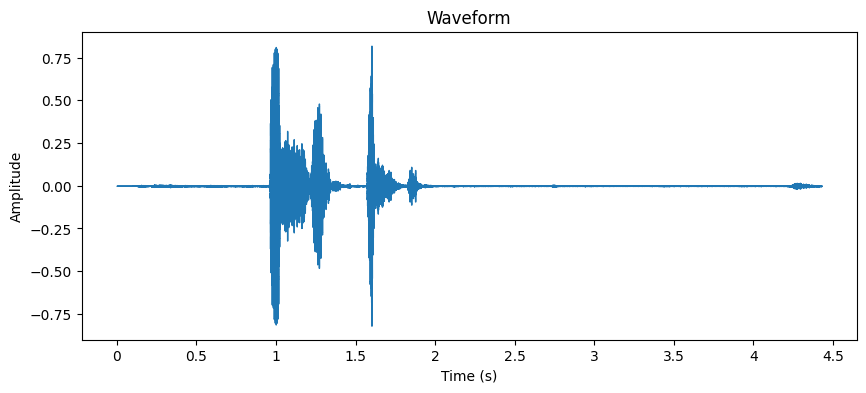

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
audio_path = "/content/processed_dataset/00a0156b-7179-4773-8a2c-4bb919e076bd.wav"  # Replace with the correct path
audio, sr = librosa.load(audio_path)

# Display the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
from pydub import AudioSegment

# Load audio file
audio_path = "/content/processed_dataset/00a0156b-7179-4773-8a2c-4bb919e076bd.wav"  # Replace with the correct path
audio = AudioSegment.from_file(audio_path)

# Play audio (requires IPython.display)
from IPython.display import Audio

Audio(audio_path)


In [ ]:
import os
import json
import librosa
import pandas as pd
import numpy as np

def extract_audio_features(wav_path):
    """
    Extract audio features (MFCCs) from a WAV file
    """
    try:
        # Load the audio file
        y, sr = librosa.load(wav_path, sr=None)

        # Extract 13 MFCCs and take their mean
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = mfccs.mean(axis=1)

        # Extract additional features
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y).mean()

        features = {
            **{f'mfcc_{i+1}': mfcc for i, mfcc in enumerate(mfccs_mean)},
            'spectral_centroid': spectral_centroid,
            'spectral_rolloff': spectral_rolloff,
            'zero_crossing_rate': zero_crossing_rate,
            'duration': len(y) / sr
        }

        return features

    except Exception as e:
        print(f"Error processing audio file {wav_path}: {str(e)}")
        return None

def extract_json_metadata(json_path):
    """
    Extract metadata from JSON file
    """
    try:
        with open(json_path, 'r') as file:
            data = json.load(file)

            # Extract relevant fields
            metadata = {
                "datetime": data.get("datetime"),
                "cough_detected": float(data.get("cough_detected", 0)),
                "age": int(data.get("age", 0)),
                "gender": data.get("gender"),
                "respiratory_condition": data.get("respiratory_condition") == "True",
                "fever_muscle_pain": data.get("fever_muscle_pain") == "True",
                "status": data.get("status")
            }

            # Extract severity if available
            expert_labels = data.get("expert_labels_1", {})
            if expert_labels:
                metadata["severity"] = expert_labels.get("severity", "unknown")

            return metadata

    except Exception as e:
        print(f"Error processing JSON file {json_path}: {str(e)}")
        return None

def create_dataset(directory):
    """
    Create dataset from WAV and JSON files in the specified directory
    """
    dataset = []

    # Get all files in directory
    files = os.listdir(directory)
    wav_files = [f for f in files if f.endswith('.wav')]

    for wav_file in wav_files:
        base_name = os.path.splitext(wav_file)[0]
        json_file = base_name + '.json'

        # Skip if JSON file doesn't exist
        if json_file not in files:
            print(f"Warning: No JSON file found for {wav_file}")
            continue

        # Full paths
        wav_path = os.path.join(directory, wav_file)
        json_path = os.path.join(directory, json_file)

        # Extract features and metadata
        audio_features = extract_audio_features(wav_path)
        metadata = extract_json_metadata(json_path)

        if audio_features and metadata:
            # Combine features and metadata
            data_point = {
                "file_name": wav_file,
                **audio_features,
                **metadata
            }
            dataset.append(data_point)

    # Convert to DataFrame
    df = pd.DataFrame(dataset)
    return df

def main():
    # Directory containing the processed dataset
    directory = "/content/processed_dataset"

    # Create dataset
    print("Creating dataset...")
    dataset = create_dataset(directory)

    if len(dataset) > 0:
        # Save dataset
        output_file = "cough_dataset.csv"
        dataset.to_csv(output_file, index=False)
        print(f"\nDataset created successfully!")
        print(f"Total samples processed: {len(dataset)}")
        print(f"Dataset saved as: {output_file}")

        # Display sample of the dataset
        print("\nFirst few rows of the dataset:")
        print(dataset.head())

        # Display basic statistics
        print("\nDataset statistics:")
        print(f"Number of features: {len(dataset.columns)}")
        print("\nNumeric columns statistics:")
        print(dataset.describe())
    else:
        print("No data points were processed successfully.")

if __name__ == "__main__":
    main()

Creating dataset...

Dataset created successfully!
Total samples processed: 332
Dataset saved as: cough_dataset.csv

First few rows of the dataset:
                                  file_name      mfcc_1     mfcc_2     mfcc_3  \
0  0c4a3aee-886e-4313-b97f-16fea6515118.wav -430.096375  49.070774 -16.271448   
1  0a6ae32e-9e1c-486a-aa96-4ecbbe9d1aaf.wav -397.455872  67.591599   9.819315   
2  0bcea474-8e87-40e5-a071-a270d58997db.wav -633.798401  25.527122   6.819622   
3  0b03673a-28db-4e1c-aeb0-4fec88d977a1.wav -439.880493  58.580143 -25.001997   
4  0bdcea0d-bcf5-4bb9-8a3a-04e92d43d7c5.wav -611.794556  53.946846   1.287768   

      mfcc_4    mfcc_5     mfcc_6     mfcc_7     mfcc_8    mfcc_9  ...  \
0   2.781205  3.857872  -9.510731  -0.399025  -2.541312 -6.724311  ...   
1  13.045077 -2.941508  15.388887  11.160439  15.833242  8.183676  ...   
2  13.347516  8.284489   1.171889   4.770705  -0.285463 -4.571882  ...   
3  -4.169603  9.588875  -3.136675   3.618012   1.988287 -7.479029  ..

In [ ]:
Dataset statistics:
Number of features: 25

Numeric columns statistics:
           mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
count    4.000000   4.000000   4.000000   4.000000   4.000000   4.000000
mean  -442.075165  63.054852  -6.083180   7.235437   6.027710  -1.028214
std     43.050362  20.339167  17.369036   7.041947   6.357456  13.735157
min   -486.988708  45.943317 -26.943731  -1.848409  -3.154563 -17.390360
25%   -472.824356  52.018302 -16.243053   4.828559   4.623528  -9.132603
50%   -443.958618  56.972557  -5.005569   7.754591   7.951927  -0.332756
75%   -413.209427  68.009104   5.154303  10.161469   9.356109   7.771632
max   -393.394714  92.330963  12.622147  15.280977  11.361549  13.943017

         mfcc_7    mfcc_8     mfcc_9   mfcc_10    mfcc_11   mfcc_12   mfcc_13  \
count  4.000000  4.000000   4.000000  4.000000   4.000000  4.000000  4.000000
mean   2.783046  0.401053  -5.042848 -1.438843  -3.101022 -0.049200  1.221959
std    1.216409  3.338909   4.752712  4.348617   7.613767  3.208029  2.905467
min    1.026100 -4.383428 -11.553931 -7.680894 -14.026690 -4.023293 -0.558388
25%    2.486599 -0.594579  -6.181312 -2.435303  -5.322872 -1.787111 -0.252364
50%    3.164525  1.476971  -4.238314 -0.206629  -0.644693  0.226853 -0.059086
75%    3.460973  2.472604  -3.099850  0.789830   1.577156  1.964764  1.415236
max    3.777033  3.033697  -0.140829  2.338778   2.911986  3.372786  5.564395

       spectral_centroid  spectral_rolloff  zero_crossing_rate  duration  \
count           4.000000          4.000000            4.000000  4.000000
mean         3543.200314       7600.553410            0.079675  8.168057
std          1243.047058       3183.598027            0.032054  2.595521
min          2350.109885       4572.947337            0.056711  4.426896
25%          2645.422151       5158.232274            0.059385  7.406724
50%          3370.483585       7262.082821            0.067909  9.142667
75%          4268.261748       9704.403958            0.088199  9.904000
max          5081.724201      11305.100661            0.126169  9.960000

       cough_detected        age
count        4.000000   4.000000
mean         0.828625  27.000000
std          0.303212  31.219652
min          0.374700   0.000000
25%          0.808500   0.000000
50%          0.972850  26.000000
75%          0.992975  53.000000
max          0.994100  56.000000

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('/content/cough_dataset.csv')  # Replace with your CSV file path

# Label Encoding for target column
encoder = LabelEncoder()
data['cough_detected'] = encoder.fit_transform(data['cough_detected'])

# Now, your 'cough_detected' column is encoded
print(data.head())


                                  file_name     mfcc_1     mfcc_2     mfcc_3  \
0  0c4a3aee-886e-4313-b97f-16fea6515118.wav -430.09637  49.070774 -16.271448   
1  0a6ae32e-9e1c-486a-aa96-4ecbbe9d1aaf.wav -397.45587  67.591600   9.819315   
2  0bcea474-8e87-40e5-a071-a270d58997db.wav -633.79840  25.527122   6.819622   
3  0b03673a-28db-4e1c-aeb0-4fec88d977a1.wav -439.88050  58.580143 -25.001997   
4  0bdcea0d-bcf5-4bb9-8a3a-04e92d43d7c5.wav -611.79456  53.946846   1.287768   

      mfcc_4    mfcc_5     mfcc_6     mfcc_7     mfcc_8    mfcc_9  ...  \
0   2.781205  3.857872  -9.510731  -0.399025  -2.541312 -6.724311  ...   
1  13.045077 -2.941508  15.388887  11.160440  15.833242  8.183676  ...   
2  13.347516  8.284489   1.171889   4.770705  -0.285463 -4.571882  ...   
3  -4.169603  9.588875  -3.136675   3.618012   1.988287 -7.479029  ...   
4 -13.318673 -7.692389  -4.530686  -3.317967  -3.384287 -1.657694  ...   

   zero_crossing_rate  duration                          datetime  \
0    

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Features and target
X = data.drop(columns=['cough_detected'])
y = data['cough_detected']

# Reshape X to 3D for CNN input (samples, timesteps, features)
# Assuming X is a 2D DataFrame of shape (samples, features)
X = X.values.reshape(X.shape[0], X.shape[1], 1)  # Reshaping to (samples, features, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define CNN model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
data = pd.read_csv('/content/cough_dataset.csv')  # Replace with the actual file path

# Drop the 'file_name' and 'datetime' columns
data = data.drop(columns=['file_name', 'datetime', 'status'])

# Label encoding for gender (optional, drop NaN rows if needed)
data['gender'] = data['gender'].fillna('unknown')  # Handle missing gender by filling with 'unknown'
gender_encoder = LabelEncoder()
data['gender'] = gender_encoder.fit_transform(data['gender'])

# Fill missing values in age or use an appropriate method
data['age'] = data['age'].fillna(data['age'].mean())  # Replace NaN with the mean of age

# Label encoding for cough_detected (already numerical, but ensure consistency)
cough_encoder = LabelEncoder()
data['cough_detected'] = cough_encoder.fit_transform(data['cough_detected'])

# Separate features (X) and target variable (y)
X = data.drop(columns=['cough_detected'])  # Features
y = data['cough_detected']  # Target

# Standardizing MFCC features (optional, depending on how the data is structured)
mfcc_columns = [col for col in X.columns if 'mfcc' in col]  # Identify MFCC columns
scaler = StandardScaler()
X[mfcc_columns] = scaler.fit_transform(X[mfcc_columns])

# Convert to numpy array
X = X.values
y = y.values

# Reshape X to match CNN input (samples, features, 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define CNN model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification (0 or 1)
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
import librosa

# Function to extract MFCC features from an audio file
def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)  # Load audio file
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract MFCC features
    return np.mean(mfcc, axis=1)  # Take the mean of each MFCC coefficient across time

# Example function to predict from an audio file
def predict_audio(audio_file):
    # Extract features from audio
    audio_features = extract_features(audio_file)

    # Normalize the extracted features (same scale as the training data)
    audio_features = scaler.transform([audio_features])  # Assuming the same scaler was used during training
    audio_features = audio_features.reshape(1, -1, 1)  # Reshape to (1, features, 1)

    # Predict using the trained CNN model
    prediction = model.predict(audio_features)

    # Decode prediction (assuming 0 = no cough, 1 = cough detected)
    predicted_label = cough_encoder.inverse_transform([int(prediction > 0.5)])[0]

    return predicted_label

# Example: Predicting from an audio file
audio_file = 'path_to_audio_file.wav'  # Replace with the actual audio file path
predicted_label = predict_audio(audio_file)

print(f"Prediction: {predicted_label}")


<ipython-input-20-5e5b88134961>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file, sr=None)  # Load audio file
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_audio_file.wav'

In [ ]:
import os
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define scaler globally (used in training and prediction)
scaler = StandardScaler()

# CNN Model definition
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(32, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification: 0 (no cough) or 1 (cough)
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to extract MFCC features
def extract_features(audio_file, n_mfcc=13):
    y, sr = librosa.load(audio_file, sr=None)  # Load audio file
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # Extract MFCC features
    return np.mean(mfcc, axis=1)  # Take mean of each MFCC coefficient

# Function to train the CNN model
def train_model(X_train, y_train, X_val, y_val, input_shape):
    # Scale the features
    global scaler
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Reshape to 3D for Conv1D input
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

    # Create and train the model
    model = create_cnn_model(input_shape)
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))
    model.save('/content/firstry.h5')
    return model

# Function to predict audio file
def predict_audio(model, audio_file):
    # Check if file exists
    if not os.path.exists(audio_file):
        raise FileNotFoundError(f"Audio file not found: {audio_file}")

    # Extract features from the audio file
    audio_features = extract_features(audio_file)

    # Normalize and reshape features
    audio_features = scaler.transform([audio_features])  # Scale using the global scaler
    audio_features = audio_features.reshape(1, -1, 1)  # Reshape to (1, features, 1)

    # Predict using the model
    prediction = model.predict(audio_features)

    # Decode prediction
    predicted_label = int(prediction > 0.5)  # Binary classification: 0 or 1
    return predicted_label

# Example: Full pipeline
if __name__ == "__main__":
    # Dummy dataset creation (replace this with actual data loading)
    # X contains MFCC features (num_samples, num_features), y contains labels
    # Replace this section with actual data loading
    num_samples = 100
    num_features = 13
    X = np.random.rand(num_samples, num_features)
    y = np.random.randint(0, 2, size=num_samples)  # Binary labels

    # Split dataset into training and validation
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    input_shape = (X_train.shape[1], 1)  # (features, 1)
    cnn_model = train_model(X_train, y_train, X_val, y_val, input_shape)

    # Test the prediction function
    audio_file = '/content/processed_dataset/00a0156b-7179-4773-8a2c-4bb919e076bd.wav'  # Replace with your file
    try:
        prediction = predict_audio(cnn_model, audio_file)
        print(f"Prediction for {audio_file}: {'Cough Detected' if prediction == 1 else 'No Cough'}")
    except FileNotFoundError as e:
        print(e)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.4969 - loss: 0.7084 - val_accuracy: 0.5500 - val_loss: 0.6958
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5031 - loss: 0.6828 - val_accuracy: 0.4000 - val_loss: 0.7237
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5516 - loss: 0.6743 - val_accuracy: 0.4000 - val_loss: 0.7513
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5516 - loss: 0.6715 - val_accuracy: 0.4000 - val_loss: 0.7715
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5516 - loss: 0.6689 - val_accuracy: 0.4000 - val_loss: 0.7807
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5516 - loss: 0.6647 - val_accuracy: 0.4000 - val_loss: 0.7816
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5516 - loss: 0.6582 - val_accuracy: 0.4000 - val_loss: 0.7772
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5516 - loss: 0.6498 - val_accuracy: 0.4000 - val_loss: 0.7712
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Prediction for /content/processed_dataset/00a0156b-7179-4773-8a2c-4bb919e076bd.wav: Cough Detected


<ipython-input-16-ddc86e9554b9>:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(prediction > 0.5)  # Binary classification: 0 or 1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def load_and_preprocess_data(csv_file):
    """
    Load and preprocess the data from CSV file
    """
    # Load the dataset
    df = pd.read_csv(csv_file)

    # Extract MFCC features (mfcc_1 to mfcc_13)
    mfcc_columns = [col for col in df.columns if col.startswith('mfcc_')]

    # Add spectral features
    feature_columns = mfcc_columns + ['spectral_rolloff', 'zero_crossing_rate', 'duration']
    X = df[feature_columns].values

    # Create labels from cough_detected column
    y = (df['cough_detected'] > 0).astype(int)

    return X, y, feature_columns

def create_model(input_shape):
    """
    Create a CNN model for cough detection with adjusted architecture
    """
    model = Sequential([
        # First Conv1D layer
        Conv1D(32, 2, activation='relu', padding='same', input_shape=input_shape),
        MaxPooling1D(2),

        # Second Conv1D layer
        Conv1D(64, 2, activation='relu', padding='same'),

        # Flatten and Dense layers
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

def train_cough_detection_model(csv_file, model_save_path='/content/cough_detection_model.h5'):
    """
    Train the cough detection model using the provided CSV dataset
    """
    # Load and preprocess data
    print("Loading and preprocessing data...")
    X, y, feature_columns = load_and_preprocess_data(csv_file)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Reshape for Conv1D (samples, timesteps, features)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Create model
    print("Creating model...")
    model = create_model((X_train.shape[1], 1))

    # Define early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train the model
    print("Training model...")
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=16,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate the model
    print("\nEvaluating model...")
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}")

    # Save the model and scaler
    print(f"\nSaving model to {model_save_path}")
    model.save(model_save_path)

    return model, scaler, history, feature_columns


def predict_single_audio(model, scaler, audio_features, feature_columns):
    """
    Make prediction for a single audio sample
    """
    # Ensure features are in the correct order
    features = audio_features[feature_columns].values.reshape(1, -1)

    # Scale features
    features_scaled = scaler.transform(features)

    # Reshape for Conv1D
    features_reshaped = features_scaled.reshape(1, features_scaled.shape[1], 1)

    # Make prediction
    prediction = model.predict(features_reshaped, verbose=0)
    return prediction[0, 0]

if __name__ == "__main__":
    # File paths
    csv_file = "/content/cough_dataset.csv"  # Your CSV file path
    model_save_path = "/content/cough_detection_model.h5"

    # Train the model
    model, scaler, history, feature_columns = train_cough_detection_model(csv_file, model_save_path)

    # Plot training history
    try:
        import matplotlib.pyplot as plt

        plt.figure(figsize=(12, 4))

        # Plot accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.savefig('training_history.png')
        print("\nTraining history plot saved as training_history.png")

    except Exception as e:
        print(f"Could not create training history plot: {str(e)}")

Loading and preprocessing data...


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

def load_and_preprocess_audio(file_path, duration=3, sr=22050):
    """Load and preprocess audio file."""
    try:
        # Load audio file with a fixed duration
        audio, sr = librosa.load(file_path, duration=duration, sr=sr)

        # Pad if audio is shorter than duration
        if len(audio) < duration * sr:
            audio = np.pad(audio, (0, duration * sr - len(audio)))

        # Extract mel spectrogram
        mel_spect = librosa.feature.melspectrogram(y=audio, sr=sr)
        mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

        # Normalize
        mel_spect_db = (mel_spect_db - np.min(mel_spect_db)) / (np.max(mel_spect_db) - np.min(mel_spect_db))

        return mel_spect_db
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return None

def create_model(input_shape):
    """Create a CNN model."""
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_model(X_train, y_train, X_val, y_val):
    """Train the model."""
    input_shape = X_train.shape[1:]
    model = create_model(input_shape)

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                       epochs=50,
                       batch_size=32,
                       validation_data=(X_val, y_val),
                       verbose=1)

    return model, history

def plot_training_history(history):
    """Plot training history."""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.close()

def predict_audio(model, audio_path):
    """Predict whether audio contains a cough."""
    # Preprocess the audio file
    mel_spect = load_and_preprocess_audio(audio_path)

    if mel_spect is None:
        return None

    # Add batch dimension
    mel_spect = np.expand_dims(mel_spect, axis=0)

    # Make prediction
    prediction = model.predict(mel_spect)
    probability = prediction[0][0]

    return probability

# Main execution
if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)

    # Define paths
    cough_dir = "path/to/cough/files"
    non_cough_dir = "path/to/non_cough/files"

    # Load and preprocess dataset
    print("Loading and preprocessing data...")
    X = []
    y = []

    # Process cough files
    for file in os.listdir(cough_dir):
        if file.endswith('.wav'):
            mel_spect = load_and_preprocess_audio(os.path.join(cough_dir, file))
            if mel_spect is not None:
                X.append(mel_spect)
                y.append(1)

    # Process non-cough files
    for file in os.listdir(non_cough_dir):
        if file.endswith('.wav'):
            mel_spect = load_and_preprocess_audio(os.path.join(non_cough_dir, file))
            if mel_spect is not None:
                X.append(mel_spect)
                y.append(0)

    X = np.array(X)
    y = np.array(y)

    # Split dataset
    indices = np.random.permutation(len(X))
    split = int(0.8 * len(X))
    train_idx, val_idx = indices[:split], indices[split:]

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Train model
    print("Training model...")
    model, history = train_model(X_train, y_train, X_val, y_val)

    # Plot training history
    plot_training_history(history)

    # Evaluate model
    print("\nEvaluating model...")
    test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}")

    # Save model
    model.save('cough_detection_model.h5')
    print("\nModel saved to cough_detection_model.h5")

    # Example prediction
    test_file = "path/to/test/audio.wav"  # Replace with your test file path
    probability = predict_audio(model, test_file)
    if probability is not None:
        print(f"\nPrediction for test file:")
        print(f"Probability of cough: {probability:.4f}")
        print(f"Classification: {'Cough' if probability > 0.5 else 'Not cough'}")

In [ ]:

    # Example prediction
    test_file = "path/to/test/audio.wav"  # Replace with your test file path
    probability = predict_audio(model, test_file)
    if probability is not None:
        print(f"\nPrediction for test file:")
        print(f"Probability of cough: {probability:.4f}")
        print(f"Classification: {'Cough' if probability > 0.5 else 'Not cough'}")

Tyrin the new code.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def load_and_preprocess_data(csv_path):
    """Load and preprocess data from CSV."""
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Extract features (MFCC, spectral rolloff, zero crossing rate)
    feature_cols = [col for col in df.columns if col.startswith('mfcc_')] + ['spectral_rolloff', 'zero_crossing_rate']
    X = df[feature_cols].values

    # Extract labels (cough_detected)
    y = df['cough_detected'].values

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y, scaler

def create_model(input_shape):
    """Create a neural network model."""
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_model(X_train, y_train, X_val, y_val):
    """Train the model."""
    input_shape = X_train.shape[1:]
    model = create_model(input_shape)

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=32,
                       validation_data=(X_val, y_val),
                       verbose=1)

    return model, history

def plot_training_history(history):
    """Plot training history."""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.close()

def predict_sample(model, scaler, features):
    """Predict whether a sample contains a cough."""
    # Normalize features using the same scaler
    features_normalized = scaler.transform(features.reshape(1, -1))

    # Make prediction
    prediction = model.predict(features_normalized)
    probability = prediction[0][0]

    return probability

# Main execution
if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)

    # Load and preprocess data
    print("Loading and preprocessing data...")
    csv_path = "/content/cough_dataset.csv"  # Replace with your CSV file path
    X, y, scaler = load_and_preprocess_data(csv_path)

    # Split dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    print("Training model...")
    model, history = train_model(X_train, y_train, X_val, y_val)

    # Plot training history
    plot_training_history(history)

    # Evaluate model
    print("\nEvaluating model...")
    test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}")

    # Save model
    model.save('/content/cough_detection_model2.h5')
    print("\nModel saved to cough_detection_model2.h5")

    # Example prediction
    # Load a sample from your dataset for prediction
    df = pd.read_csv(csv_path)
    feature_cols = [col for col in df.columns if col.startswith('mfcc_')] + ['spectral_rolloff', 'zero_crossing_rate']
    sample_features = df[feature_cols].iloc[0].values  # Using first row as example

    probability = predict_sample(model, scaler, sample_features)
    print(f"\nPrediction for sample:")
    print(f"Probability of cough: {probability:.4f}")
    print(f"Classification: {'Cough' if probability > 0.5 else 'Not cough'}")

Loading and preprocessing data...
Training model...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.0061 - loss: 0.6764 - val_accuracy: 0.0000e+00 - val_loss: 0.6469
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0061 - loss: 0.6366 - val_accuracy: 0.0000e+00 - val_loss: 0.6072
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0061 - loss: 0.5945 - val_accuracy: 0.0000e+00 - val_loss: 0.5626
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0061 - loss: 0.5551 - val_accuracy: 0.0000e+00 - val_loss: 0.5240
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0061 - loss: 0.5059 - val_accuracy: 0.0000e+00 - val_loss: 0.4970
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0061 - loss: 0.4974 - val_accuracy: 0.0000e+00 - val_loss: 0.4731
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0061 - loss: 0.4906 - val_accuracy: 0.0000e+00 - val_loss: 0.4674
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/


Evaluating model...
Test accuracy: 0.0000
Test loss: 0.4807

Model saved to cough_detection_model2.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Prediction for sample:
Probability of cough: 0.9893
Classification: Cough


In [ ]:
    # Example prediction
    # Load a sample from your dataset for prediction
    df = pd.read_csv(csv_path)
    feature_cols = [col for col in df.columns if col.startswith('mfcc_')] + ['spectral_rolloff', 'zero_crossing_rate']
    for i in range(5):
      sample_features = df[feature_cols].iloc[i].values  # Using first row as example

      probability = predict_sample(model, scaler, sample_features)
      print(f"\nPrediction for sample:")
      print(f"Probability of cough: {probability:.4f}")
      print(f"Classification: {'Cough' if probability > 0.5 else 'Not cough'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Prediction for sample:
Probability of cough: 0.9826
Classification: Cough
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Prediction for sample:
Probability of cough: 0.8799
Classification: Cough
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Prediction for sample:
Probability of cough: 0.2874
Classification: Not cough
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Prediction for sample:
Probability of cough: 0.9811
Classification: Cough
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Prediction for sample:
Probability of cough: 0.5521
Classification: Cough


In [ ]:
!ls -lh /content/processed_dataset | wc -l

75


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def load_and_preprocess_data(csv_path):
    """Load and preprocess data from CSV."""
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Extract features (MFCC, spectral rolloff, zero crossing rate)
    feature_cols = [col for col in df.columns if col.startswith('mfcc_')] + ['spectral_rolloff', 'zero_crossing_rate']
    X = df[feature_cols].values

    # Extract labels (cough_detected)
    y = df['cough_detected'].values

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Reshape for transformer input (add sequence dimension)
    X = X.reshape(X.shape[0], -1, 1)

    return X, y, scaler

def create_transformer_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4, mlp_units=[128], dropout=0.3, mlp_dropout=0.2):
    """Create a transformer-based model."""
    inputs = layers.Input(shape=input_shape)
    x = inputs

    # Add positional encoding
    positions = tf.range(start=0, limit=input_shape[0], delta=1)
    positions = tf.cast(positions, dtype=tf.float32)
    positions = positions[tf.newaxis, :, tf.newaxis]
    scale = head_size ** -0.5
    x = x + positions * scale

    # Transformer blocks
    for _ in range(num_transformer_blocks):
        x = TransformerBlock(head_size, num_heads, ff_dim, dropout)(x)

    # Global average pooling
    x = layers.GlobalAveragePooling1D()(x)

    # MLP layers
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    return models.Model(inputs, outputs)

def train_model(X_train, y_train, X_val, y_val):
    """Train the model."""
    input_shape = X_train.shape[1:]
    model = create_transformer_model(input_shape)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Add early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Add learning rate reduction on plateau
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    return model, history

def plot_training_history(history):
    """Plot training history."""
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.close()

def predict_sample(model, scaler, features):
    """Predict whether a sample contains a cough."""
    # Normalize features using the same scaler
    features_normalized = scaler.transform(features.reshape(1, -1))
    # Reshape for transformer input
    features_normalized = features_normalized.reshape(1, -1, 1)

    # Make prediction
    prediction = model.predict(features_normalized)
    probability = prediction[0][0]

    return probability

# Main execution
if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)

    # Load and preprocess data
    print("Loading and preprocessing data...")
    csv_path = "/content/cough_dataset.csv"
    X, y, scaler = load_and_preprocess_data(csv_path)

    # Split dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train model
    print("Training model...")
    model, history = train_model(X_train, y_train, X_val, y_val)

    # Plot training history
    plot_training_history(history)

    # Evaluate model
    print("\nEvaluating model...")
    test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"Test accuracy: {test_accuracy:.4f}")
    print(f"Test loss: {test_loss:.4f}")

    # Save model
    model.save('/content/cough_detection_model_transformer.h5')
    print("\nModel saved to cough_detection_model_transformer.h5")

    # Example prediction
    df = pd.read_csv(csv_path)
    feature_cols = [col for col in df.columns if col.startswith('mfcc_')] + ['spectral_rolloff', 'zero_crossing_rate']
    sample_features = df[feature_cols].iloc[0].values

    probability = predict_sample(model, scaler, sample_features)
    print(f"\nPrediction for sample:")
    print(f"Probability of cough: {probability:.4f}")
    print(f"Classification: {'Cough' if probability > 0.5 else 'Not cough'}")

Loading and preprocessing data...


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

# [Previous TransformerBlock class implementation remains the same]

def load_and_preprocess_data(csv_path):
    """Load and preprocess data from CSV."""
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Extract features (MFCC, spectral rolloff, zero crossing rate)
    feature_cols = [col for col in df.columns if col.startswith('mfcc_')] + ['spectral_rolloff', 'zero_crossing_rate']
    X = df[feature_cols].values

    # Extract labels (cough_detected)
    y = df['cough_detected'].values

    # Print class distribution
    print("\nClass distribution:")
    for class_label, count in Counter(y).items():
        print(f"Class {class_label}: {count} samples")

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Reshape for transformer input (add sequence dimension)
    X = X.reshape(X.shape[0], -1, 1)

    return X, y, scaler

def create_transformer_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4, mlp_units=[128], dropout=0.3, mlp_dropout=0.2):
    """Create a transformer-based model."""
    inputs = layers.Input(shape=input_shape)
    x = inputs

    # Add positional encoding
    positions = tf.range(start=0, limit=input_shape[0], delta=1)
    positions = tf.cast(positions, dtype=tf.float32)
    positions = positions[tf.newaxis, :, tf.newaxis]
    scale = head_size ** -0.5
    x = x + positions * scale

    # Transformer blocks
    for _ in range(num_transformer_blocks):
        x = TransformerBlock(head_size, num_heads, ff_dim, dropout)(x)

    # Global average pooling
    x = layers.GlobalAveragePooling1D()(x)

    # MLP layers
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    return models.Model(inputs, outputs)

def train_model(X_train, y_train, X_val, y_val):
    """Train the model with class weights."""
    input_shape = X_train.shape[1:]
    model = create_transformer_model(input_shape)

    # Calculate class weights
    n_samples = len(y_train)
    n_classes = len(np.unique(y_train))
    class_weights = {i: n_samples / (n_classes * np.sum(y_train == i)) for i in range(n_classes)}

    print("\nClass weights:", class_weights)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Add early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Add learning rate reduction on plateau
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        class_weight=class_weights,
        verbose=1
    )

    return model, history

# [Previous plotting and prediction functions remain the same]

# Main execution
if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)

    # Load and preprocess data
    print("Loading and preprocessing data...")
    csv_path = "/content/cough_dataset.csv"
    X, y, scaler = load_and_preprocess_data(csv_path)

    # Split dataset without stratification
    print("\nSplitting dataset...")
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nTraining set shape: {X_train.shape}")
    print(f"Training set class distribution: {np.bincount(y_train)}")
    print(f"Validation set shape: {X_val.shape}")
    print(f"Validation set class distribution: {np.bincount(y_val)}")

    # Train model
    print("\nTraining model...")
    model, history = train_model(X_train, y_train, X_val, y_val)

    # [Rest of the main execution remains the same]

Loading and preprocessing data...

Class distribution:
Class 0.9504: 1 samples
Class 0.0964: 1 samples
Class 0.2798: 1 samples
Class 0.9822: 1 samples
Class 0.0399: 1 samples
Class 0.8648: 1 samples
Class 0.0201: 1 samples
Class 0.8023: 1 samples
Class 0.9815: 1 samples
Class 0.3747: 1 samples
Class 0.9926: 1 samples
Class 0.3393: 1 samples
Class 0.2889: 1 samples
Class 0.579: 1 samples
Class 0.9807: 1 samples
Class 0.933: 1 samples
Class 0.9078: 1 samples
Class 0.4639: 1 samples
Class 0.6614: 1 samples
Class 0.9089: 1 samples
Class 0.9973: 1 samples
Class 0.0373: 1 samples
Class 0.9699: 1 samples
Class 0.9334: 1 samples
Class 0.9063: 1 samples
Class 0.922: 1 samples
Class 0.9531: 1 samples
Class 0.9775: 1 samples
Class 0.9941: 1 samples
Class 0.706: 1 samples
Class 0.9877: 1 samples
Class 0.99: 1 samples

Splitting dataset...

Training set shape: (25, 15, 1)


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

class TransformerBlock(layers.Layer):
    def __init__(self, head_size, num_heads, ff_dim, dropout=0):
        super().__init__()
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)
        self.ffn = models.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(head_size),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout)
        self.dropout2 = layers.Dropout(dropout)

    def call(self, inputs, training):
        attn_output = self.attention(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def load_and_preprocess_data(csv_path):
    """Load and preprocess data from CSV."""
    df = pd.read_csv(csv_path)

    # Extract features (MFCC, spectral rolloff, zero crossing rate)
    feature_cols = [col for col in df.columns if col.startswith('mfcc_')] + ['spectral_rolloff', 'zero_crossing_rate']
    X = df[feature_cols].values
    y = df['cough_detected'].values

    # Print class distribution
    print("\nClass distribution:")
    for class_label, count in Counter(y).items():
        print(f"Class {class_label}: {count} samples")

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Reshape for transformer input (add sequence dimension)
    X = X.reshape(X.shape[0], -1, 1)

    return X, y, scaler

def create_transformer_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4, mlp_units=[128], dropout=0.3, mlp_dropout=0.2):
    """Create a transformer-based model."""
    inputs = layers.Input(shape=input_shape)
    x = inputs

    # Add positional encoding
    positions = tf.range(start=0, limit=input_shape[0], delta=1)
    positions = tf.cast(positions, dtype=tf.float32)
    positions = positions[tf.newaxis, :, tf.newaxis]
    scale = head_size ** -0.5
    x = x + positions * scale

    # Transformer blocks
    for _ in range(num_transformer_blocks):
        x = TransformerBlock(head_size, num_heads, ff_dim, dropout)(x)

    # Global average pooling
    x = layers.GlobalAveragePooling1D()(x)

    # MLP layers
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)

    outputs = layers.Dense(1, activation="sigmoid")(x)

    return models.Model(inputs, outputs)

def train_model(X_train, y_train, X_val, y_val):
    """Train the model with class weights."""
    input_shape = X_train.shape[1:]
    model = create_transformer_model(input_shape)

    # Calculate class weights
    n_samples = len(y_train)
    n_classes = len(np.unique(y_train))
    class_weights = {i: n_samples / (n_classes * np.sum(y_train == i)) for i in range(n_classes)}

    print("\nClass weights:", class_weights)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Add early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Add learning rate reduction on plateau
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        class_weight=class_weights,
        verbose=1
    )

    return model, history

if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)

    # Load and preprocess data
    print("Loading and preprocessing data...")
    csv_path = "/content/cough_dataset.csv"
    X, y, scaler = load_and_preprocess_data(csv_path)

    # Ensure labels are integers for bincount
    y = y.astype(int)

    # Split dataset without stratification
    print("\nSplitting dataset...")
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nTraining set shape: {X_train.shape}")
    print(f"Training set class distribution: {np.bincount(y_train)}")
    print(f"Validation set shape: {X_val.shape}")
    print(f"Validation set class distribution: {np.bincount(y_val)}")

    # Train model
    print("\nTraining model...")
    model, history = train_model(X_train, y_train, X_val, y_val)


Loading and preprocessing data...

Class distribution:
Class 0.9504: 1 samples
Class 0.0964: 1 samples
Class 0.2798: 1 samples
Class 0.9822: 1 samples
Class 0.0399: 1 samples
Class 0.8648: 1 samples
Class 0.0201: 1 samples
Class 0.8023: 1 samples
Class 0.9815: 1 samples
Class 0.3747: 1 samples
Class 0.9926: 1 samples
Class 0.3393: 1 samples
Class 0.2889: 1 samples
Class 0.579: 1 samples
Class 0.9807: 1 samples
Class 0.933: 1 samples
Class 0.9078: 1 samples
Class 0.4639: 1 samples
Class 0.6614: 1 samples
Class 0.9089: 1 samples
Class 0.9973: 1 samples
Class 0.0373: 1 samples
Class 0.9699: 1 samples
Class 0.9334: 1 samples
Class 0.9063: 1 samples
Class 0.922: 1 samples
Class 0.9531: 1 samples
Class 0.9775: 1 samples
Class 0.9941: 1 samples
Class 0.706: 1 samples
Class 0.9877: 1 samples
Class 0.99: 1 samples

Splitting dataset...

Training set shape: (25, 15, 1)
Training set class distribution: [25]
Validation set shape: (7, 15, 1)
Validation set class distribution: [7]

Training model...

TypeError: missing a required argument: 'training'